This Project can be accessed @ [kalucira.github.io](https://github.com/kalucira/kalucira.github.io)
<br>
<br>
$\textbf{CIRUS KALUGANA}$
<br>
$\textbf{Tulane University}$
<br>
$\textbf{Data Science Course Final Project}$
<br>
$\textbf{Project Milestone 3}$
<br>
<br>
$\textbf{12/15/2022}$
<br>
<br>

$\textbf{Project Goals:}$

The goal of this project is to explore the temporal and spatial distribution of earthquakes around New Zealand from 1990 - 2022, and investigate the possible relation with the motion of the subducting tectonic plates.
<br>
<br>
The motivation of this project comes from the series of migrating seismic swarms of small and medium size magnitude earthquakes which have been happening around New Zealand in the previous years, with the country recording up to 15000 earthquakes per year. This region is undergoing plate boundary collisions wit the Pacific Plate subducting beneath the Australian Plate. It is important to understand the relation between the two quantities i.e. plate motion and earthquakes occurrences not only to understand the kinematics of the deformation around the Australian and Pacific Plate but to generalize it to any other subduction zone.
<br>
<br>
In this project I have worked alone as required for graduate students.
<br>
<br>
$\textbf{Project Explanations:}$
<br>
To achieve the goal of this project, two data sets were required, the first one about the earthquakes occurrences in the study region and the second set about the motion of the plates on which New Zealand is seated.
<br>
<br>
The first set of data was obtained from the a seismic data management centre called [Incorporated Research Institutions for Seismology - IRIS](https://service.iris.edu/). The data was acquired by downloading it using a code from an Observational Python library called [ObsPy](https://docs.obspy.org/).
<br>
<br>
The second set of data about the motion of the plates is the Global Positioning System (GPS) data recorded by GPS stations from different parts of the region in New Zealand. This data was obtained from [Nevada Geodetic Laboratory](http://geodesy.unr.edu/NGLStationPages/gpsnetmap/GPSNetMap.html) website which stores the GPS data for most of the GPS stations around the world.
<br>
<br>
The fisrt set of data contains four aspects of the earthquake that is the earthquake magnitude, location (latitude and longitude), time and depth at which it occured. The data set comes as a catalog, a default ObsPy format but can be converted into a pandas `DataFrame` format.
<br>
The data catalog is first plotted to take a look at the distribution of earthquakes around the region . It is then read into a `DataFrame` format and the times column seperated into year and actual time of occurence which enables studying the temporal distribution over years' period.
<br>
<br>
The second set of data contains the locations and displacements of the the GPS stations with time with their errors. This enables calculation of the velocities of the GPS stations which indicate the velocities of the plates with time and shows the changes in the trend for the displacements and velocities. This is then studied in correspondence with earthquake events occurence and we can be able to infer their relation.

In [ ]:
# Installing the required softwares and libraries
!pip install obspy ;

!apt-get update

!apt install libspatialindex-dev
!pip install rtree
!pip install --upgrade geopandas

!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.5 MB 5.3 MB/s 
     |████████████████████████████████| 9.4 MB 55.2 MB/s 
     |████████████████████████████████| 965 kB 70.4 MB/s 
     |████████████████████████████████| 295 kB 17.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:14 http://ppa.launchpad.net

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/DataSci Project

Mounted at /content/drive
/content/drive/My Drive/DataSci Project


Importing the required libraries

In [ ]:
from obspy.clients.fdsn.client import Client
from obspy import Stream, UTCDateTime
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
from shapely.geometry import Point
import geopandas
import numpy as np
import pandas as pd
import os
import pprint
from scipy import stats
import seaborn as sns
import plotly.express as px

$\textbf{First Data Set}$

The earthquake seismic data is downloaded using the codes below using the Client with the server as [FDSN](https://www.fdsn.org/networks/?paginate=no)  under IRIS data management centre. The time period and location coordinates of study region are specified to obtain the data.

In [ ]:
client_global = Client("IRIS")

starttime = UTCDateTime(1990, 1, 1, 0, 0)
endtime = UTCDateTime(2022, 10, 30, 23, 59)

minlatitude, maxlatitude = -55, -30
minlongitude, maxlongitude = 160,  -175

cat1 = client_global.get_events(starttime, endtime, minlatitude, maxlatitude, minlongitude, maxlongitude)                    
print(cat1)

124138 Event(s) in Catalog:
2022-10-30T22:39:14.596000Z | -30.957, -179.232 | 4.3  mb
2022-10-30T21:27:17.255000Z | -33.733, +179.640 | 4.6  mb
...
1990-01-01T05:50:36.560000Z | -36.974, +177.558 | 3.9  mL
1990-01-01T03:10:34.670000Z | -38.607, +176.126 | 3.7  mL
To see all events call 'print(CatalogObject.__str__(print_all=True))'


The required data from the catalog is then extracted as below

In [ ]:
magnitudes = [event.magnitudes[0].mag for event in cat1]
time = [event.origins[0].time.datetime for event in cat1]
depths = [event.origins[0].depth for event in cat1]
Latitudes = [event.origins[0].latitude for event in cat1]
Longitudes = [event.origins[0].longitude for event in cat1]

The dataframe version of the earthquake data is as below

In [ ]:
DataEQ = pd.DataFrame ({'magnitudes':magnitudes, 'time':time, 'depths':depths, 'Latitudes':Latitudes, 'Longitudes':Longitudes}, 
                   columns = ['magnitudes','time','depths','Latitudes','Longitudes'])
DataEQ.head()


magnitudes                    time   depths  Latitudes  Longitudes
0         4.3 2022-10-30 22:39:14.596  10000.0   -30.9570   -179.2322
1         4.6 2022-10-30 21:27:17.255  98806.0   -33.7325    179.6401
2         4.5 2022-10-29 23:35:54.510  80015.0   -42.0176    172.6593
3         5.5 2022-10-28 03:55:58.910  43000.0   -35.6283   -179.2027
4         4.7 2022-10-27 21:19:34.104  97590.0   -38.6865    176.2185

The catalog is plotted to take a see the events distribution on the world map, unfortunately, a smaller map for the study region required some files which I had issues accesing.

In [ ]:
fig = px.scatter_geo(DataEQ, lat='Latitudes', lon='Longitudes', hover_name="magnitudes")
fig.update_layout(title = 'Significant Earthquakes, 1990-2022', title_x=1)
fig. show()

The times column data is seperated into actual time of occurence, month and year for easy grouping of the data when doing the analysis.

In [ ]:
#DataEQ["magnitudes"] = DataEQ.magnitudes.astype('category')
DataEQ['year_int'] = pd.DatetimeIndex(DataEQ['time']).year
DataEQ["year"] = DataEQ.year_int.astype('str')
DataEQ['month_int'] = pd.DatetimeIndex(DataEQ['time']).month
DataEQ["month"] = (DataEQ["month_int"].astype('str')).map({"1": "Jan", "2": "Feb", "3": "Mar", "4": "Apr", "5": "May",
                                                           "6": "Jun", "7": "Jul", "8": "Aug", "9": "Sep", "10": "Oct",
                                                           "11": "Nov", "12": "Dec"})
DataEQ.head()

magnitudes                    time   depths  Latitudes  Longitudes  \
0         4.3 2022-10-30 22:39:14.596  10000.0   -30.9570   -179.2322   
1         4.6 2022-10-30 21:27:17.255  98806.0   -33.7325    179.6401   
2         4.5 2022-10-29 23:35:54.510  80015.0   -42.0176    172.6593   
3         5.5 2022-10-28 03:55:58.910  43000.0   -35.6283   -179.2027   
4         4.7 2022-10-27 21:19:34.104  97590.0   -38.6865    176.2185   

   year_int  year  month_int month  
0      2022  2022         10   Oct  
1      2022  2022         10   Oct  
2      2022  2022         10   Oct  
3      2022  2022         10   Oct  
4      2022  2022         10   Oct

$\textbf{Exploratory Data Analysis:}$

A simple exploratory study is taken to identify how the data is distributed and to determine possible relationships. 
<br>


$\textbf{Histogram for magnitude distribution}$

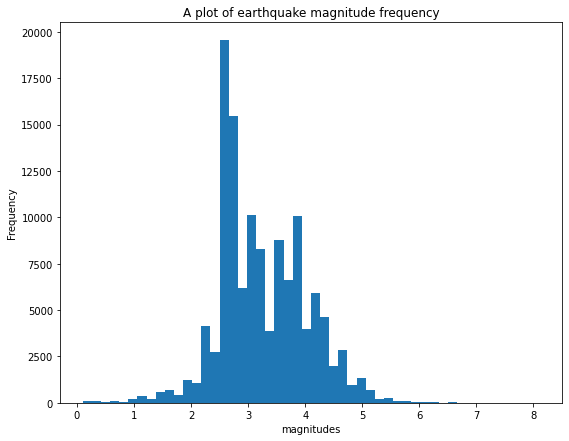

In [ ]:
plt.figure(figsize=(9,7))
DataEQ['magnitudes'].astype('float64').plot.hist(bins=50)
plt.title('A plot of earthquake magnitude frequency')
plt.xlabel('magnitudes')
plt.show()

The first plot is a histogram which shows the distribution of the number of earthquakes with magnitudes from year 1990 - 2022
From this plot, we can infer that majority of the earthquakes are small to medium magnitude earthquakes.
<br>
However, this data is for the recorded earthquakes, in reality there are extremely more small magnitude earthquakes with an exponential relation. This means most of the small magnitude earthquakes were not recorded. For this reason, later on, the final analysis will be done for only the earthquakes with magnitude 3 and above beacause;
<br>
1. To have a clear picture of earthquakes felt with less bias in the data as almost all magnitude > 3 earthquakes are recorded.
2. Larger magnitude earthquakes are expected to have more significant effect on plate motion than the small magnitude < 3 earthquakes.

$\textbf{Histogram for earthquake distribution with time}$

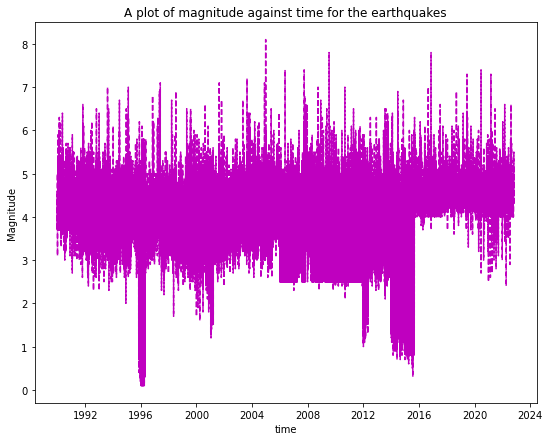

In [ ]:
plt.figure(figsize=(9,7))
plt.title('A plot of magnitude against time for the earthquakes')
plt.xlabel('time')
plt.ylabel('Magnitude') 
plt.plot(time,magnitudes,'m--')
plt.show()

The second plot above is a histogram that looks at the distribution of earthquake magnitudes with time. The trend in this plot is not so clear, however, there are features to look at such as the mean magnitude being around 4, some large magnitude earthquakes upto magnitude 8 and the variations of the lower magnitude mark.

$\textbf{Histogram for earthquakes' magnitudes distribution with depths}$

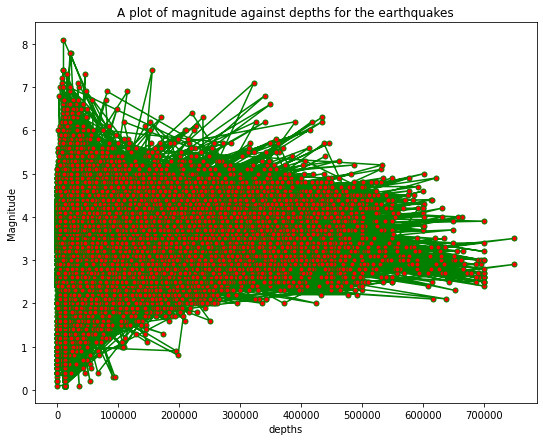

In [ ]:
plt.figure(figsize=(9,7))
plt.title('A plot of magnitude against depths for the earthquakes')
plt.xlabel('depths')
plt.ylabel('Magnitude') 
plt.plot(depths,magnitudes,color = 'green',linestyle = 'solid', marker = '.',markerfacecolor = 'red', markersize = 10)
plt.show()

From the plot above, we can conclude that there are many both small magnitude and large magnitude earthquakes occuring at shallower and at deeper depths. However, most of the earthquakes occurred at relatively shallower, to averagely deep depths.

$\textbf{Evaluating the measures of central tendency such as means and medians for the data}$

The mean and median magnitude of the earthquakes, the largest magnitude earthquake ever recorded in the region and the mean, median and largest predicted depths of the earthquakes are shown below. These help characterize the nature of earthquakes recorded in the region, i.e from the mean and median value of the magnitudes, we can infer that the region experinces mainly small magnitude earthquakes. However, majority of the earthquakes are relatively shallow with earthquakes as compared with average depth of the subduction linked earthquakes. This means that these earthquakes are influenced by the upper part of the subducting plates. This means they could have an effect on the plate motion.

In [ ]:
[DataEQ['magnitudes'].mean(), DataEQ['magnitudes'].median(), DataEQ['magnitudes'].max(), DataEQ['depths'].mean(),
 DataEQ['depths'].median(), DataEQ['depths'].max()]

[3.2373535903591164, 3.1, 8.1, 67001.75464096945, 31700.0, 750000.0]

$\textbf{Further detailed analysis follows below}$

The first piece of analysis done is grouping the data by year and by month plotting them to identify any kind of trend in their data. This is done for the magnitudes data and the depths data.

The first section is the analysis for the overall mean magnitudes distribution with time. Both the mean per year and mean per month data are plotted to compare if they correlate and and decide which one could work best in showing the relation. 

In [ ]:
Meanmag_dfyr = (DataEQ.groupby(["year"])['magnitudes'].mean())
Meanmag_dfmn = (DataEQ.groupby(["year","month"])['magnitudes'].mean())
Meanmag_dfyr = Meanmag_dfyr.to_frame().reset_index()
Meanmag_dfmn = Meanmag_dfmn.to_frame().reset_index()

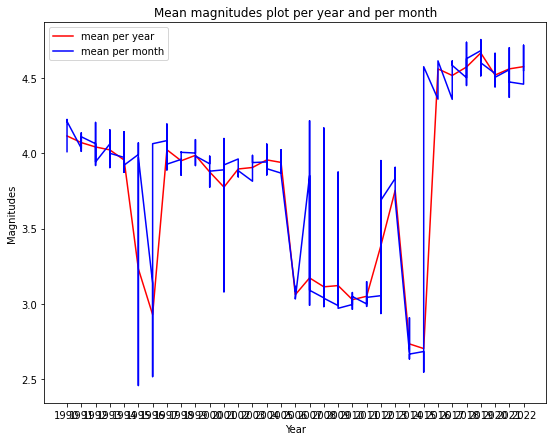

In [ ]:
plt.figure(figsize=(9,7))
plt.plot(Meanmag_dfyr['year'], Meanmag_dfyr['magnitudes'], color='r', label='mean per year')
plt.plot(Meanmag_dfmn['year'], Meanmag_dfmn['magnitudes'], color='b', label='mean per month')
plt.title('Mean magnitudes plot per year and per month')
plt.ylabel('Magnitudes')
plt.xlabel('Year')
plt.legend()
plt.show()

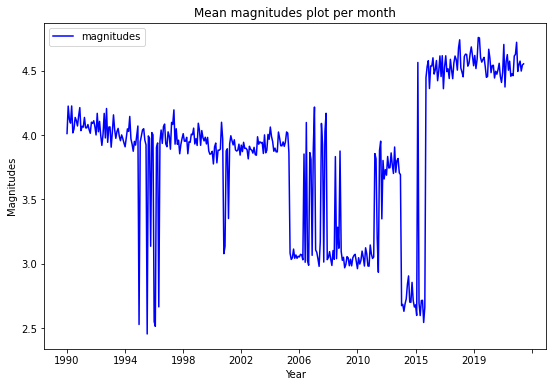

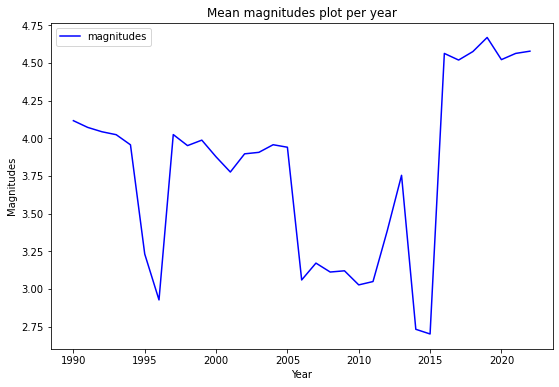

In [ ]:
Meanmag_dfmn.plot(x='year', y=['magnitudes'], color='b', figsize=(9,6))
plt.title('Mean magnitudes plot per month')
plt.ylabel('Magnitudes')
plt.xlabel('Year')
Meanmag_dfyr.plot(x='year', y=['magnitudes'], color='b', figsize=(9,6))
plt.title('Mean magnitudes plot per year')
plt.ylabel('Magnitudes')
plt.xlabel('Year')
plt.show()

The above graphs show us that the mean magnitudes of the earthquakes follow a certain trend, it was generally reducing from 1990 up to around 2015, and then all of a sudden went high meaning there was increased seismicity from around 2015 onwards in the region. The data also shows that mean per is a good measure of seismicity in the region, however, the mean per month would be a better way to give a clear and accurate dipiction of the seismicity in the region. This is shown in the data between 2006 and 2010 where mean per year doesn't represent the fully the peaks in the data in that period of time.

The second section for analysis in this data set is the depth variation. Depths at which the earthquakes occur may have a significant effect on plate motion as it can waeken the plates and/or reduce friction between the plates thereby speeding up the plates. This can be used to explain the tectonic regime of the region also show that the upper part of the plate could be becoming weaker. Thus shallower earthquakes may cause a significant change in the velocities of these plates.
<br>
This data is also grouped per year and per month and plotted as below

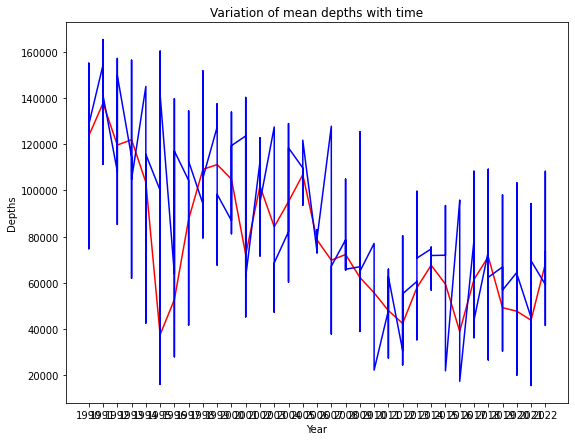

In [ ]:
Meandep_dfyr = (DataEQ.groupby(["year"])['depths'].mean())
Meandep_dfyr = Meandep_dfyr.to_frame().reset_index()
Meandep_dfmn = (DataEQ.groupby(["year","month"])['depths'].mean())
Meandep_dfmn = Meandep_dfmn.to_frame().reset_index()
plt.figure(figsize=(9,7))
plt.plot(Meandep_dfyr['year'], Meandep_dfyr['depths'], color='r', label='mean per year')
plt.plot(Meandep_dfmn['year'], Meandep_dfmn['depths'], color='b', label='mean per month')
plt.title('Variation of mean depths with time')
plt.ylabel('Depths')
plt.xlabel('Year')
plt.show()

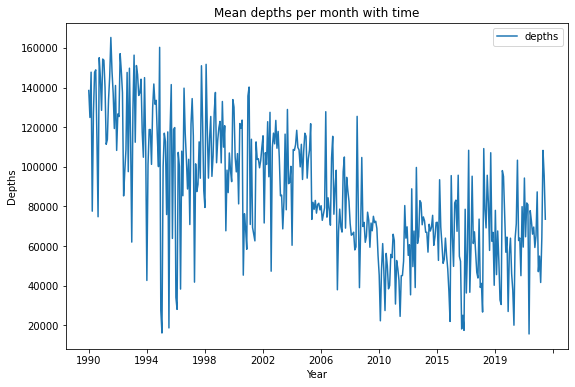

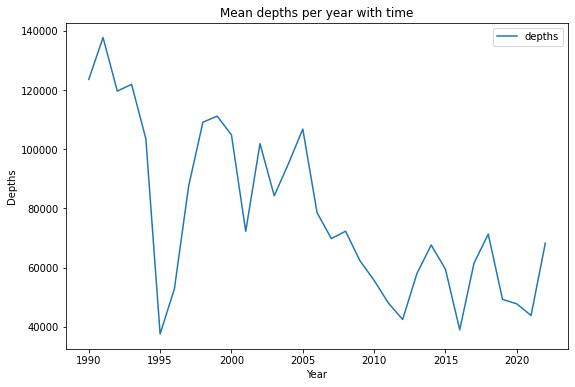

In [ ]:
Meandep_dfmn.plot(x='year', y=['depths'], kind='line', figsize=(9,6))
plt.title('Mean depths per month with time')
plt.ylabel('Depths')
plt.xlabel('Year')
Meandep_dfyr.plot(x='year', y=['depths'], kind='line', figsize=(9,6))
plt.title('Mean depths per year with time')
plt.ylabel('Depths')
plt.xlabel('Year')
plt.show()

The trend in the depth in the graphs above show us that majority of the recent earthquakes have been happening at shallower depths than before. This would strongly influence the motion of the plates (speed and direction). And just like the mean magnitudes distribution plots, the mean per month is a better representative than the mean per year though the mean per year may give a general picture of the distribution.

The data is the filtered to consider only eartquakes with magnitudes >= 3 and their cumulative effect in a given location evaluated. The cummulative effect is evaluated as the Weighted Index Mean Magnitude.
<br>
The plots for the weighted index mean magnitudes per year and per month are the made and analysed.

In [ ]:
Filtered_df = DataEQ.groupby(["year","month"])['magnitudes'].value_counts()
Filtered_df = pd.DataFrame({'Counts': DataEQ.groupby(["year",'month'])['magnitudes'].value_counts()})
Filtered_df = Filtered_df.reset_index()
Filtered_df = Filtered_df.drop(Filtered_df[(Filtered_df['magnitudes'] < 3)].index)
Filtered_df['W_I_mag'] = Filtered_df['Counts']*Filtered_df['magnitudes']
Filtered_df.head()

year month  magnitudes  Counts  W_I_mag
0  1990   Apr         3.7      20     74.0
1  1990   Apr         3.9      16     62.4
2  1990   Apr         3.8      14     53.2
3  1990   Apr         4.1       8     32.8
4  1990   Apr         4.0       5     20.0

The code below lookss at the mean of the sorted data per year and per month

In [ ]:
Filtmeanmag_dfyr = (Filtered_df.groupby(["year"])['magnitudes'].mean())
Filtmeanmag_dfmn = (Filtered_df.groupby(["year","month"])['magnitudes'].mean())
Filtmeanmag_dfyr = Filtmeanmag_dfyr.to_frame().reset_index()
Filtmeanmag_dfmn = Filtmeanmag_dfmn.to_frame().reset_index()

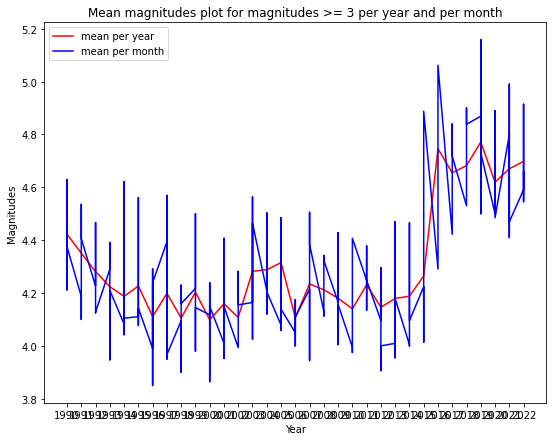

In [ ]:
plt.figure(figsize=(9,7))
plt.plot(Filtmeanmag_dfyr['year'], Filtmeanmag_dfyr['magnitudes'], color='r', label='mean per year')
plt.plot(Filtmeanmag_dfmn['year'], Filtmeanmag_dfmn['magnitudes'], color='b', label='mean per month')
plt.title('Mean magnitudes plot for magnitudes >= 3 per year and per month')
plt.ylabel('Magnitudes')
plt.xlabel('Year')
plt.legend()
plt.show()

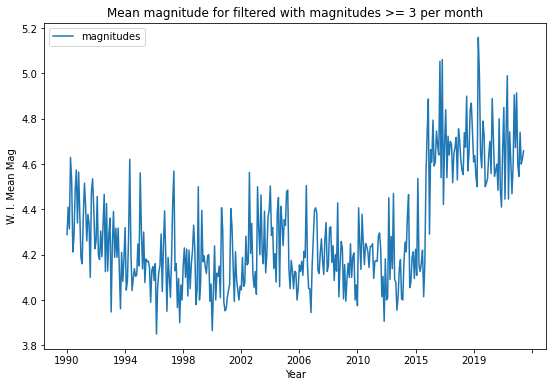

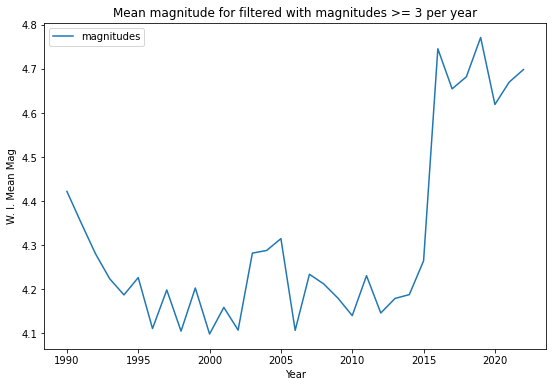

In [ ]:
Filtmeanmag_dfmn.plot(x='year', y=['magnitudes'], kind='line', figsize=(9,6))
plt.title('Mean magnitude for filtered with magnitudes >= 3 per month')
plt.ylabel('W. I. Mean Mag')
plt.xlabel('Year')
Filtmeanmag_dfyr.plot(x='year', y=['magnitudes'], kind='line', figsize=(9,6))
plt.title('Mean magnitude for filtered with magnitudes >= 3 per year')
plt.ylabel('W. I. Mean Mag')
plt.xlabel('Year')
plt.show()

In general, the mean magnitudes for larger earthquakes was fluctuating in a reducing manner, untill around 2002 when it goes high a bit but goes back. The highest is again experienced 2015 onwards.

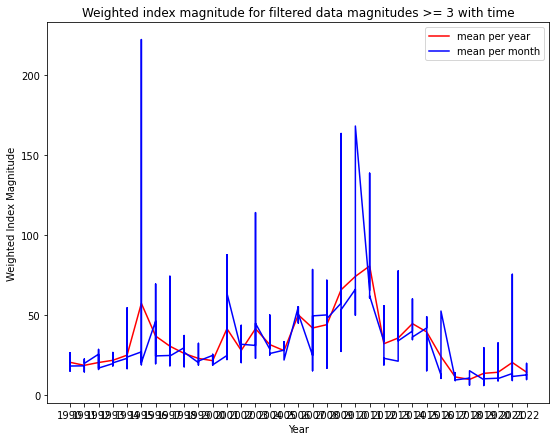

In [ ]:
WMean_dfyr = (Filtered_df.groupby(['year'])['W_I_mag'].mean())
WMean_dfyr = WMean_dfyr.to_frame().reset_index()
WMean_dfmn = (Filtered_df.groupby(['year','month'])['W_I_mag'].mean())
WMean_dfmn = WMean_dfmn.to_frame().reset_index()
plt.figure(figsize=(9,7))
plt.plot(WMean_dfyr['year'], WMean_dfyr['W_I_mag'], color='r', label='mean per year')
plt.plot(WMean_dfmn['year'], WMean_dfmn['W_I_mag'], color='b', label='mean per month')
plt.title('Weighted index magnitude for filtered data magnitudes >= 3 with time')
plt.ylabel('Weighted Index Magnitude')
plt.xlabel('Year')
plt.legend()
plt.show()

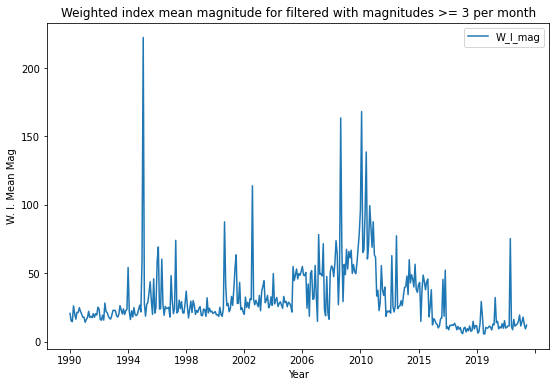

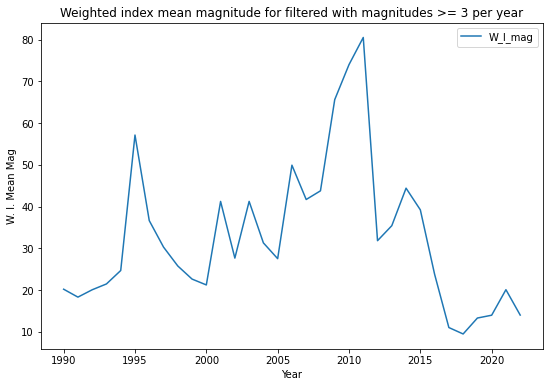

In [ ]:
WMean_dfmn.plot(x='year', y=['W_I_mag'], kind='line', figsize=(9,6))
plt.title('Weighted index mean magnitude for filtered with magnitudes >= 3 per month')
plt.ylabel('W. I. Mean Mag')
plt.xlabel('Year')
WMean_dfyr.plot(x='year', y=['W_I_mag'], kind='line', figsize=(9,6))
plt.title('Weighted index mean magnitude for filtered with magnitudes >= 3 per year')
plt.ylabel('W. I. Mean Mag')
plt.xlabel('Year')
plt.show()

Unlike the mean magnitudes plots, cummulative magnitudes mean (weighted index mean magnitudes) take different shapes. They correlate negatively but may be important to analyse too.

$\textbf{Second Data Set}$

The second set of data from the GPS stations downloaded online seperately in text format each file corresponding to a given GPS stations from different locations around New Zealand and is uploaded and explored in the following cells.
<br>
The ten (10) files are read and converted into a `DataFrame` format. The GPS stations selected started operating between 1995 to 2002 and their names are output when plots are made. The following stations are picked from the northen island: (AUCK, HIKB, PAEK, NPLY, WGTN) while these are from southern island: (HOKI, LYTT, NLSN, OUSD, VEXA). 
<br>
This is the section which clearly shows whether the plate motion has an influence and or is being influenced by other factors such as earthquakes by looking at the changes in velocities of the GPS stations.
Since the parameters in this study are less, that is magnitude, depth and velocity, I will limit my research to exploring the relationships aong the parameters, comparing the trends and the correlations. I will there have heatmap plots for each station data. 

$\textbf{Loading and anlysing second part of the data:}$
<br>
The unwanted columns showing the standard errors, and the locations in degrees, since the remaining columns give the same information but in meters are removed.

In [ ]:
list_of_frams = []
variables = locals()
df = locals()
for i in range(1,11):
    variables["Station{0}".format(i)] = open(f'../DataSci Project/Station{i}.txt','r')
    df["df{0}".format(i)] = pd.read_fwf(f"Station{i}.txt")
    list_of_frams.append(variables["df{0}".format(i)])

In [ ]:
Datafram = pd. concat(list_of_frams)
Datafram.reset_index(inplace=True)
Datafram = Datafram.drop(columns=['index','week','d','yyyy.yyyy','_e0(m)','____n0(m)','u0(m)','__MJD','reflon','_ant(m)','sig_e(m)','sig_n(m)',
                                  'sig_u(m)','__corr_en','__corr_eu','__corr_nu','__height(m)'])
Datafram.head()

site  YYMMMDD  __east(m)  _north(m)  ____up(m)  _latitude(deg)  \
0  AUCK  95MAY31   0.542713  -0.248693   0.700912      -36.602846   
1  AUCK  95JUN01   0.540893  -0.243142   0.691049      -36.602846   
2  AUCK  95SEP18   0.534670  -0.238254   0.680948      -36.602846   
3  AUCK  95SEP19   0.530306  -0.236401   0.677724      -36.602846   
4  AUCK  95SEP20   0.534688  -0.240542   0.697275      -36.602846   

   _longitude(deg)  
0      -185.165615  
1      -185.165615  
2      -185.165615  
3      -185.165615  
4      -185.165615

The data is then cleaned and new columns defined for the time duration, displacements and the velocities of the GPS station which represent the motion of the plates.
<br>
Xd, Yd and Yd are the displacements in the East-West, North-South and the vertical direction.
<br>
Vh, Vz and Vt are the resultant horizontal component, the vertical component  and the resultant  velocities of the two components of the GPS stations (same as for the plates) evaluated by dividing displacements with time durations, and taking appropriate mathematics for composite velocities.

In [ ]:
Datafram['YYMMMDD'] = pd.to_datetime(Datafram['YYMMMDD'], format='%y%b%d')
Datafram.rename(columns = {'YYMMMDD':'time','__east(m)':'Xd','_north(m)':'Yd','____up(m)':'Zd'}, inplace=True)
Datafram["year"] = pd.DatetimeIndex(Datafram["time"]).year
Datafram["month_int"] = pd.DatetimeIndex(Datafram["time"]).month
Datafram["month_int"] = Datafram.month_int.astype('str')
Datafram["month"] = Datafram["month_int"].map({"1": "Jan", "2": "Feb", "3": "Mar", "4": "Apr", "5": "May", "6": "Jun", "7": "Jul",
                                           "8": "Aug", "9": "Sep", "10": "Oct", "11": "Nov", "12": "Dec"})
Datafram['time_dur'] = Datafram['time'].diff()
Datafram['time_dur'] = Datafram['time_dur'].dt.total_seconds().fillna(1000000)
Datafram["Horiz_disp"] = np.sqrt((Datafram["Xd"])**2 + (Datafram["Yd"])**2)
Datafram["Total_disp"] = np.sqrt((Datafram["Xd"])**2 + (Datafram["Yd"])**2 + (Datafram["Zd"])**2)
Datafram["Vh"] = (1000*Datafram['Horiz_disp'])/Datafram['time_dur']
Datafram["Vz"] = (1000*Datafram['Zd'])/Datafram['time_dur']
Datafram["Vt"] = (1000*Datafram['Total_disp'])/Datafram['time_dur']

In [ ]:
Datafram.head()

site       time        Xd        Yd        Zd  _latitude(deg)  \
0  AUCK 1995-05-31  0.542713 -0.248693  0.700912      -36.602846   
1  AUCK 1995-06-01  0.540893 -0.243142  0.691049      -36.602846   
2  AUCK 1995-09-18  0.534670 -0.238254  0.680948      -36.602846   
3  AUCK 1995-09-19  0.530306 -0.236401  0.677724      -36.602846   
4  AUCK 1995-09-20  0.534688 -0.240542  0.697275      -36.602846   

   _longitude(deg)  year month_int month   time_dur  Horiz_disp  Total_disp  \
0      -185.165615  1995         5   May  1000000.0    0.596980    0.920686   
1      -185.165615  1995         6   Jun    86400.0    0.593029    0.910622   
2      -185.165615  1995         9   Sep  9417600.0    0.585352    0.897957   
3      -185.165615  1995         9   Sep    86400.0    0.580612    0.892424   
4      -185.165615  1995         9   Sep    86400.0    0.586303    0.911013   

         Vh        Vz        Vt  
0  0.000597  0.000701  0.000921  
1  0.006864  0.007998  0.010540  
2  0.000062  0.000072  0.000095  
3  0.006720  0.007844  0.010329  
4  0.006786  0.008070  0.010544

Plots for the different components of the velocities are made and analysed as follows:

The horizontal component which is the resultant of the two components of the North-South and East-West velocities is here plotted.


array([[<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>]], dtype=object)

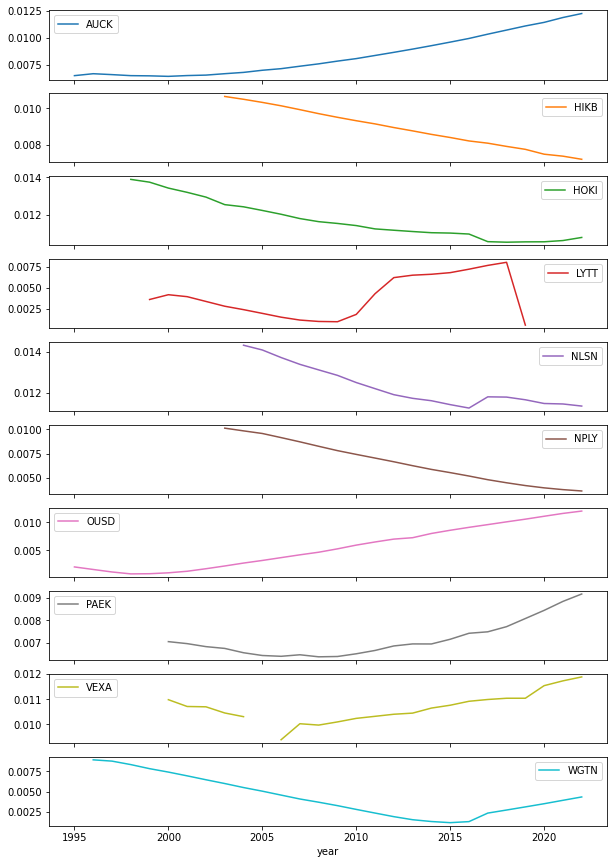

In [ ]:
pd.pivot_table(Datafram.reset_index(),
               index='year', columns='site', values='Vh'
              ).plot(subplots=True, layout=(10,1), figsize=(10,15))

From the graphs, we can say that some parts of the plate are accelerating while others are deccerating in each of the Islands. The graphs also show that some regions have had their velocities altered to the extent that their trend were totally changed i.e. from reducing to increasing and vice-versa. This is shown for example in the WGTN station whose trend changed around 2015 while LYTT has its velocities linearly and drastically reducing and these events correponds to great rise in the magnitude of earthquakes and lowest in the depths on earthquakes.

The vertical components of the velocities are plotted and look-like as below

array([[<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>]], dtype=object)

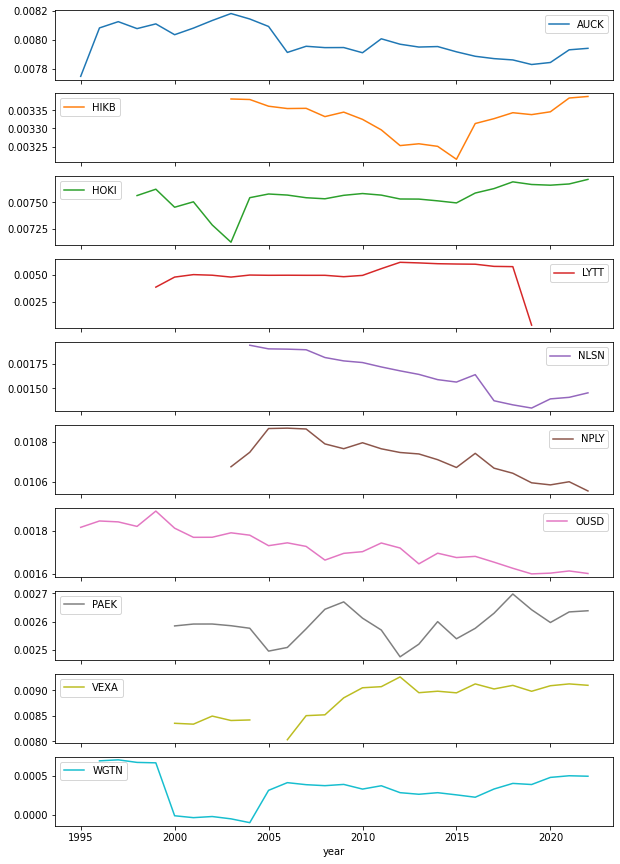

In [ ]:
pd.pivot_table(Datafram.reset_index(),
               index='year', columns='site', values='Vz'
              ).plot(subplots=True, layout=(10,1), figsize=(10,15))

The vertical components shows that some regions are on average stationary while some parts have had their trend going down meaning the plate motion speeds in the vertical direction are reducing especially from the Southern Island as shown by her GPS stations such as NLSN, NPLY and OUSD. This would mean a sudden locking or unlocking of the plate.

The total or resultant velocity for both the horizontal and vertical components are plotted below.

array([[<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>],
       [<AxesSubplot: xlabel='year'>]], dtype=object)

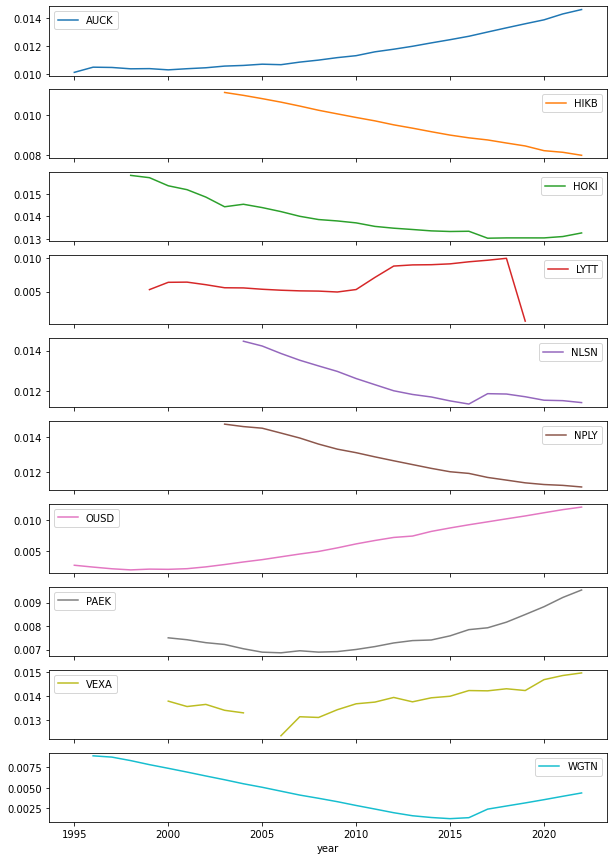

In [ ]:
pd.pivot_table(Datafram.reset_index(),
               index='year', columns='site', values='Vt'
              ).plot(subplots=True, layout=(10,1), figsize=(10,15))

The plots for the total resultant velocity for both components by comparisons are very similar to the plots for thr horizontal component alone. Thus I will consider the just the horizontal component in its place and the vertical component seperately.

For proper analysis, the data is grouped by site (GPS locations) so that the each site is considered seperately since it is practically difficult or impossible to deal with all of the sites at once and to interprete the results when combined with the seismic data. The gropued data is further grouped by year and by month before analysing the relations.
<br>
<br>
For the general analysis, the two data sets are combined to obtain one whole data set consisting of both earthquake data and GPS velocities data for the two Islands. In the general analysis, the data is averaged annually.
<br>
The correlations and corresponding heapmaps are obtained for each station and the relationships evaluated.

In [ ]:
Gsitedf_yr = Datafram.groupby(['site','year'])['Vh'].mean()
Gsitedf_yr = Gsitedf_yr.to_frame()
Vz_frameyr = Datafram.groupby(['site','year'])['Vz'].mean()
Vz_frameyr = Vz_frameyr.to_frame()
Gsitedf_yr['Vz'] = Vz_frameyr['Vz']
display(Gsitedf_yr.head())
Sitedf_yr = Gsitedf_yr.transpose()
display(Sitedf_yr.head())

Vh        Vz
site year                    
AUCK 1995  0.006484  0.007751
     1996  0.006663  0.008083
     1997  0.006579  0.008126
     1998  0.006484  0.008078
     1999  0.006465  0.008111

site      AUCK                                                              \
year      1995      1996      1997      1998      1999      2000      2001   
Vh    0.006484  0.006663  0.006579  0.006484  0.006465  0.006417  0.006491   
Vz    0.007751  0.008083  0.008126  0.008078  0.008111  0.008037  0.008082   

site                                ...      WGTN                      \
year      2002      2003      2004  ...      2013      2014      2015   
Vh    0.006534  0.006665  0.006785  ...  0.001559  0.001338  0.001199   
Vz    0.008134  0.008182  0.008144  ...  0.000262  0.000282  0.000254   

site                                                                        
year      2016      2017      2018      2019      2020      2021      2022  
Vh    0.001326  0.002369  0.002743  0.003125  0.003514  0.003931  0.004341  
Vz    0.000224  0.000330  0.000402  0.000388  0.000479  0.000500  0.000494  

[2 rows x 233 columns]

Extracting GPS data for the individual stations to obtain Site data.

In [ ]:
AUCK = (Sitedf_yr[['AUCK']].transpose())
AUCK.reset_index(inplace=True)

HIKB = Sitedf_yr[['HIKB']].transpose()
HIKB.reset_index(inplace=True)

NPLY = Sitedf_yr[['NPLY']].transpose()
NPLY.reset_index(inplace=True)

PAEK = Sitedf_yr[['PAEK']].transpose()
PAEK.reset_index(inplace=True)

WGTN = Sitedf_yr[['WGTN']].transpose()
WGTN.reset_index(inplace=True)

HOKI = Sitedf_yr[['HOKI']].transpose()
HOKI.reset_index(inplace=True)

LYTT = Sitedf_yr[['LYTT']].transpose()
LYTT.reset_index(inplace=True)

NLSN = Sitedf_yr[['NLSN']].transpose()
NLSN.reset_index(inplace=True)

OUSD = Sitedf_yr[['OUSD']].transpose()
OUSD.reset_index(inplace=True)

VEXA = Sitedf_yr[['VEXA']].transpose()
VEXA.reset_index(inplace=True)

Adding the data for the mean magnitudes of earthquakes per year to the Site data.

In [ ]:
Meanmag_dfyr['year'] = Meanmag_dfyr['year'].astype('int64')
AUCK_EQ1 = (Meanmag_dfyr.drop(Meanmag_dfyr.loc[ Meanmag_dfyr['year'] < AUCK['year'].min() ].index)).set_index('year').reset_index()

HIKB_EQ1 = (Meanmag_dfyr.drop(Meanmag_dfyr.loc[ Meanmag_dfyr['year'] < HIKB['year'].min() ].index)).set_index('year').reset_index()

NPLY_EQ1 = (Meanmag_dfyr.drop(Meanmag_dfyr.loc[ Meanmag_dfyr['year'] < NPLY['year'].min() ].index)).set_index('year').reset_index()

PAEK_EQ1 = (Meanmag_dfyr.drop(Meanmag_dfyr.loc[ Meanmag_dfyr['year'] < PAEK['year'].min() ].index)).set_index('year').reset_index()

WGTN_EQ1 = (Meanmag_dfyr.drop(Meanmag_dfyr.loc[ Meanmag_dfyr['year'] < WGTN['year'].min() ].index)).set_index('year').reset_index()

HOKI_EQ1 = (Meanmag_dfyr.drop(Meanmag_dfyr.loc[ Meanmag_dfyr['year'] < HOKI['year'].min() ].index)).set_index('year').reset_index()

LYTT_EQ1 = (Meanmag_dfyr.drop(Meanmag_dfyr.loc[ Meanmag_dfyr['year'] < LYTT['year'].min() ].index)).set_index('year').reset_index()

NLSN_EQ1 = (Meanmag_dfyr.drop(Meanmag_dfyr.loc[ Meanmag_dfyr['year'] < NLSN['year'].min() ].index)).set_index('year').reset_index()

OUSD_EQ1 = (Meanmag_dfyr.drop(Meanmag_dfyr.loc[ Meanmag_dfyr['year'] < OUSD['year'].min() ].index)).set_index('year').reset_index()

VEXA_EQ1 = (Meanmag_dfyr.drop(Meanmag_dfyr.loc[ Meanmag_dfyr['year'] < VEXA['year'].min() ].index)).set_index('year').reset_index()

Adding the data for the weighted index mean magnitudes of earthquakes per year to the Site data.

In [ ]:
WMean_dfyr['year'] = WMean_dfyr['year'].astype('int64')
AUCK_EQ2 = (WMean_dfyr.drop(WMean_dfyr.loc[ WMean_dfyr['year'] < AUCK['year'].min() ].index)).set_index('year').reset_index()

HIKB_EQ2 = (WMean_dfyr.drop(WMean_dfyr.loc[ WMean_dfyr['year'] < HIKB['year'].min() ].index)).set_index('year').reset_index()

NPLY_EQ2 = (WMean_dfyr.drop(WMean_dfyr.loc[ WMean_dfyr['year'] < NPLY['year'].min() ].index)).set_index('year').reset_index()

PAEK_EQ2 = (WMean_dfyr.drop(WMean_dfyr.loc[ WMean_dfyr['year'] < PAEK['year'].min() ].index)).set_index('year').reset_index()

WGTN_EQ2 = (WMean_dfyr.drop(WMean_dfyr.loc[ WMean_dfyr['year'] < WGTN['year'].min() ].index)).set_index('year').reset_index()

HOKI_EQ2 = (WMean_dfyr.drop(WMean_dfyr.loc[ WMean_dfyr['year'] < HOKI['year'].min() ].index)).set_index('year').reset_index()

LYTT_EQ2 = (WMean_dfyr.drop(WMean_dfyr.loc[ WMean_dfyr['year'] < LYTT['year'].min() ].index)).set_index('year').reset_index()

NLSN_EQ2 = (WMean_dfyr.drop(WMean_dfyr.loc[ WMean_dfyr['year'] < NLSN['year'].min() ].index)).set_index('year').reset_index()

OUSD_EQ2 = (WMean_dfyr.drop(WMean_dfyr.loc[ WMean_dfyr['year'] < OUSD['year'].min() ].index)).set_index('year').reset_index()

VEXA_EQ2 = (WMean_dfyr.drop(WMean_dfyr.loc[ WMean_dfyr['year'] < VEXA['year'].min() ].index)).set_index('year').reset_index()


The depths data is also extracted and added to the Site data

In [ ]:
Meandep_dfyr['year'] = Meandep_dfyr['year'].astype('int64')
AUCK_Dep = (Meandep_dfyr.drop(Meandep_dfyr.loc[ Meandep_dfyr['year'] < AUCK['year'].min() ].index)).set_index('year').reset_index()

HIKB_Dep = (Meandep_dfyr.drop(Meandep_dfyr.loc[ Meandep_dfyr['year'] < HIKB['year'].min() ].index)).set_index('year').reset_index()

NPLY_Dep = (Meandep_dfyr.drop(Meandep_dfyr.loc[ Meandep_dfyr['year'] < NPLY['year'].min() ].index)).set_index('year').reset_index()

PAEK_Dep = (Meandep_dfyr.drop(Meandep_dfyr.loc[ Meandep_dfyr['year'] < PAEK['year'].min() ].index)).set_index('year').reset_index()

WGTN_Dep = (Meandep_dfyr.drop(Meandep_dfyr.loc[ Meandep_dfyr['year'] < WGTN['year'].min() ].index)).set_index('year').reset_index()

HOKI_Dep = (Meandep_dfyr.drop(Meandep_dfyr.loc[ Meandep_dfyr['year'] < HOKI['year'].min() ].index)).set_index('year').reset_index()

LYTT_Dep = (Meandep_dfyr.drop(Meandep_dfyr.loc[ Meandep_dfyr['year'] < LYTT['year'].min() ].index)).set_index('year').reset_index()

NLSN_Dep = (Meandep_dfyr.drop(Meandep_dfyr.loc[ Meandep_dfyr['year'] < NLSN['year'].min() ].index)).set_index('year').reset_index()

OUSD_Dep = (Meandep_dfyr.drop(Meandep_dfyr.loc[ Meandep_dfyr['year'] < OUSD['year'].min() ].index)).set_index('year').reset_index()

VEXA_Dep = (Meandep_dfyr.drop(Meandep_dfyr.loc[ Meandep_dfyr['year'] < VEXA['year'].min() ].index)).set_index('year').reset_index()

The final combined data for each station is the obtained as below

In [ ]:
AUCK['mean_mag'] = AUCK_EQ1['magnitudes']
AUCK['W_I_M_mag'] = AUCK_EQ2['W_I_mag']
AUCK['mean_dep'] = AUCK_Dep['depths']

HIKB['mean_mag'] = HIKB_EQ1['magnitudes']
HIKB['W_I_M_mag'] = HIKB_EQ2['W_I_mag']
HIKB['mean_dep'] = HIKB_Dep['depths']

NPLY['mean_mag'] = NPLY_EQ1['magnitudes']
NPLY['W_I_M_mag'] = NPLY_EQ2['W_I_mag']
NPLY['mean_dep'] = NPLY_Dep['depths']

PAEK['mean_mag'] = PAEK_EQ1['magnitudes']
PAEK['W_I_M_mag'] = PAEK_EQ2['W_I_mag']
PAEK['mean_dep'] = PAEK_Dep['depths']

WGTN['mean_mag'] = WGTN_EQ1['magnitudes']
WGTN['W_I_M_mag'] = WGTN_EQ2['W_I_mag']
WGTN['mean_dep'] = WGTN_Dep['depths']

HOKI['mean_mag'] = HOKI_EQ1['magnitudes']
HOKI['W_I_M_mag'] = HOKI_EQ2['W_I_mag']
HOKI['mean_dep'] = HOKI_Dep['depths']

LYTT['mean_mag'] = LYTT_EQ1['magnitudes']
LYTT['W_I_M_mag'] = LYTT_EQ2['W_I_mag']
LYTT['mean_dep'] = LYTT_Dep['depths']

NLSN['mean_mag'] = NLSN_EQ1['magnitudes']
NLSN['W_I_M_mag'] = NLSN_EQ2['W_I_mag']
NLSN['mean_dep'] = NLSN_Dep['depths']

OUSD['mean_mag'] = OUSD_EQ1['magnitudes']
OUSD['W_I_M_mag'] = OUSD_EQ2['W_I_mag']
OUSD['mean_dep'] = OUSD_Dep['depths']

VEXA['mean_mag'] = VEXA_EQ1['magnitudes']
VEXA['W_I_M_mag'] = VEXA_EQ2['W_I_mag']
VEXA['mean_dep'] = VEXA_Dep['depths']

Example of the Site data for VEXA GPS station is seen below

In [ ]:
VEXA.head()

site  year        Vh        Vz  mean_mag  W_I_M_mag       mean_dep
0  VEXA  2000  0.010979  0.008356  3.876547  21.251429  104853.188406
1  VEXA  2001  0.010711  0.008339  3.775789  41.253668   72227.882392
2  VEXA  2002  0.010698  0.008498  3.896568  27.678059  101879.396092
3  VEXA  2003  0.010455  0.008411  3.906470  41.265182   84271.133231
4  VEXA  2004  0.010309  0.008422  3.956997  31.325092   95159.507206

The relations between the different considered parameters for each GPS / Site stations are the explored from below.

$\textbf{The first Site AUCK}$

Vh        Vz  mean_mag  W_I_M_mag  mean_dep
Vh         1.000000 -0.621561  0.476483  -0.416913 -0.568096
Vz        -0.621561  1.000000 -0.051802   0.006222  0.717339
mean_mag   0.476483 -0.051802  1.000000  -0.793818  0.088093
W_I_M_mag -0.416913  0.006222 -0.793818   1.000000 -0.218739
mean_dep  -0.568096  0.717339  0.088093  -0.218739  1.000000

<AxesSubplot: >

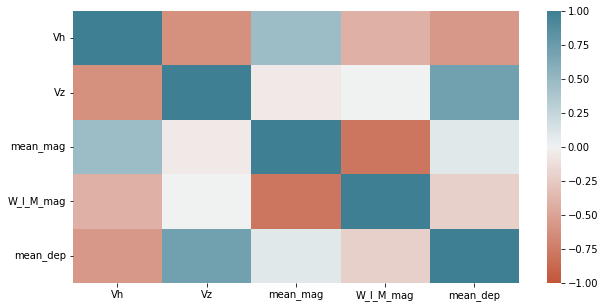

In [ ]:
AUCK1 = AUCK.drop(columns=["year","site"])
display(AUCK1.corr())
plt.figure(figsize = (10,5))
sns.heatmap(AUCK1.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

From the above correlations and the heatmap, we can conclude that some parameters are positively correlated while others are negatively correlated for example;
<br>
1. Vh the horizontal component of velocity is strongly and negatively correlated with Vz the vertical component of velocity. This implies the plates moves faster horizontally when the are more stable in the vertical.
2. There is also strong negative correlation between Vh and mean depth. This means plates will move faster horizontally when earthquakes are occuring more at the shallower depths than when they are deep, as expected.
3. Vh is lightly negatively correlated to the weighted index mean magnitude but lightly positely correlated with the actual mean magnitude. The positive correlation with the mean magnitude as expcted means the more earhtquakes may trigger an increase in the plate velocities or an increase in the plate velocities may results into occurence of more earthquakes although the later is less like to happen.
<br>
For this site, Vz is very lihtly correlated with the mean magnitude but not correlated at with the weighted index mean magnitude.
<br>
It is meaningless to look at the correlations between mean magnitude and weighted index mean magnitude.

$\textbf{The second Site HIKB}$

Vh        Vz  mean_mag  W_I_M_mag  mean_dep
Vh         1.000000  0.146068 -0.533994   0.548647  0.667666
Vz         0.146068  1.000000  0.513194  -0.229074  0.399694
mean_mag  -0.533994  0.513194  1.000000  -0.814598 -0.120259
W_I_M_mag  0.548647 -0.229074 -0.814598   1.000000  0.003601
mean_dep   0.667666  0.399694 -0.120259   0.003601  1.000000

<AxesSubplot: >

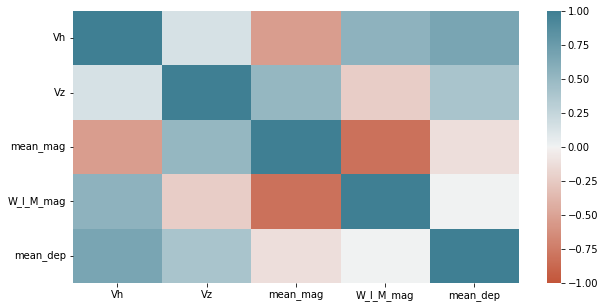

In [ ]:
HIKB1 = HIKB.drop(columns=["year","site"])
display(HIKB1.corr())
plt.figure(figsize = (10,5))
sns.heatmap(HIKB1.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

This site is described just the previous one, however, there are a few things to note for example the weighted index mean magnitude is now positively correlated with Vh and Vz and Vh have an extremely very low correlation.

The site that follow can also be explained in the same way by looking at correlations. One important thing to note is that the sites are being affected differently for different parametersi.e. same parameters may have a positive strong correlation in one site and negative strong correlation in another site. An example is the positive correlation of mean depth with Vh at AUCK, PAEK, LYTT, OUSD and VEXA while the same parameters have negative correlations in sites HIKB, NPLY, HOKI and NLSN.

$\textbf{The third Site NPLY}$

Vh        Vz  mean_mag  W_I_M_mag  mean_dep
Vh         1.000000  0.789045 -0.521682   0.540359  0.682645
Vz         0.789045  1.000000 -0.627682   0.598960  0.396195
mean_mag  -0.521682 -0.627682  1.000000  -0.814598 -0.120259
W_I_M_mag  0.540359  0.598960 -0.814598   1.000000  0.003601
mean_dep   0.682645  0.396195 -0.120259   0.003601  1.000000

<AxesSubplot: >

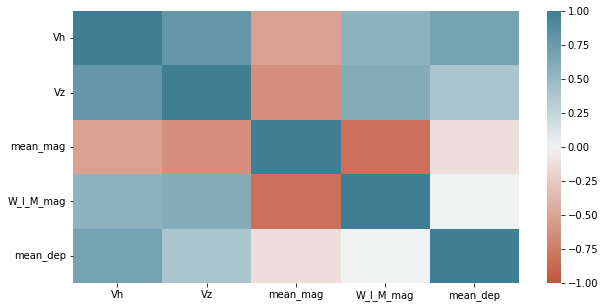

In [ ]:
NPLY1 = NPLY.drop(columns=["year","site"])
display(NPLY1.corr())
plt.figure(figsize = (10,5))
sns.heatmap(NPLY1.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

$\textbf{The fourth Site PAEK}$

Vh        Vz  mean_mag  W_I_M_mag  mean_dep
Vh         1.000000  0.397175  0.719151  -0.661807 -0.392999
Vz         0.397175  1.000000  0.343876  -0.166085 -0.116933
mean_mag   0.719151  0.343876  1.000000  -0.808224 -0.064308
W_I_M_mag -0.661807 -0.166085 -0.808224   1.000000 -0.088002
mean_dep  -0.392999 -0.116933 -0.064308  -0.088002  1.000000

<AxesSubplot: >

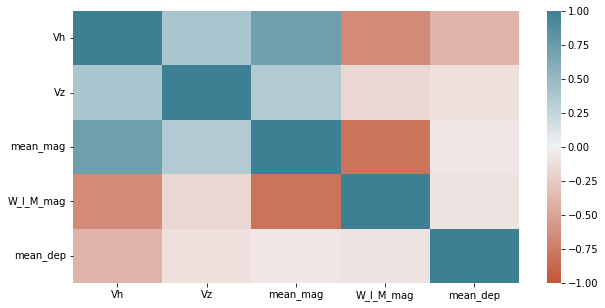

In [ ]:
PAEK1 = PAEK.drop(columns=["year","site"])
display(PAEK1.corr())
plt.figure(figsize = (10,5))
sns.heatmap(PAEK1.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

$\textbf{The fifth Site WGTN}$

Vh        Vz  mean_mag  W_I_M_mag  mean_dep
Vh         1.000000  0.166811  0.096592  -0.158591  0.670694
Vz         0.166811  1.000000  0.019607  -0.094010 -0.130211
mean_mag   0.096592  0.019607  1.000000  -0.788831  0.046900
W_I_M_mag -0.158591 -0.094010 -0.788831   1.000000 -0.162777
mean_dep   0.670694 -0.130211  0.046900  -0.162777  1.000000

<AxesSubplot: >

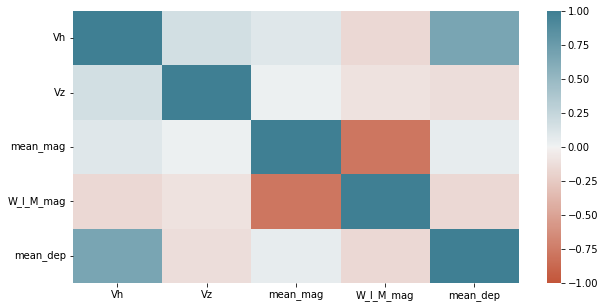

In [ ]:
WGTN1 = WGTN.drop(columns=["year","site"])
display(WGTN1.corr())
plt.figure(figsize = (10,5))
sns.heatmap(WGTN1.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

$\textbf{The sixth Site HOKI}$

Vh        Vz  mean_mag  W_I_M_mag  mean_dep
Vh         1.000000 -0.469591 -0.141576   0.083664  0.839627
Vz        -0.469591  1.000000  0.315672  -0.265544 -0.341968
mean_mag  -0.141576  0.315672  1.000000  -0.809114 -0.007075
W_I_M_mag  0.083664 -0.265544 -0.809114   1.000000 -0.156265
mean_dep   0.839627 -0.341968 -0.007075  -0.156265  1.000000

<AxesSubplot: >

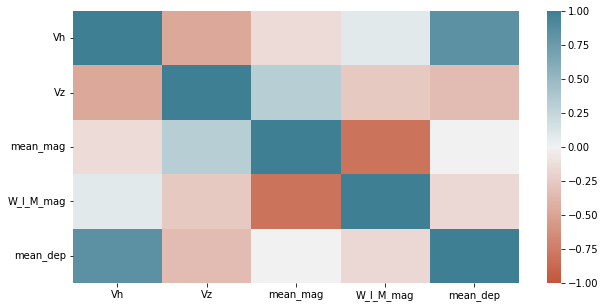

In [ ]:
HOKI1 = HOKI.drop(columns=["year","site"])
display(HOKI1.corr())
plt.figure(figsize = (10,5))
sns.heatmap(HOKI1.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

$\textbf{The seventh Site LYTT}$

Vh        Vz  mean_mag  W_I_M_mag  mean_dep
Vh         1.000000  0.620965  0.212833  -0.363937 -0.298277
Vz         0.620965  1.000000 -0.342398   0.202629 -0.132611
mean_mag   0.212833 -0.342398  1.000000  -0.775677  0.127816
W_I_M_mag -0.363937  0.202629 -0.775677   1.000000 -0.270856
mean_dep  -0.298277 -0.132611  0.127816  -0.270856  1.000000

<AxesSubplot: >

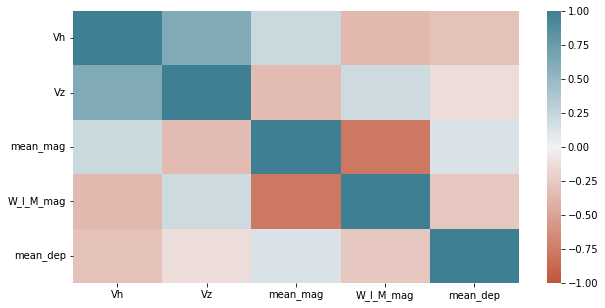

In [ ]:
LYTT1 = LYTT.drop(columns=["year","site"])
display(LYTT1.corr())
plt.figure(figsize = (10,5))
sns.heatmap(LYTT1.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

$\textbf{The eighth Site NLSN}$

Vh        Vz  mean_mag  W_I_M_mag  mean_dep
Vh         1.000000  0.833240 -0.336305   0.337291  0.785911
Vz         0.833240  1.000000 -0.626016   0.624317  0.529738
mean_mag  -0.336305 -0.626016  1.000000  -0.820892 -0.139771
W_I_M_mag  0.337291  0.624317 -0.820892   1.000000 -0.014257
mean_dep   0.785911  0.529738 -0.139771  -0.014257  1.000000

<AxesSubplot: >

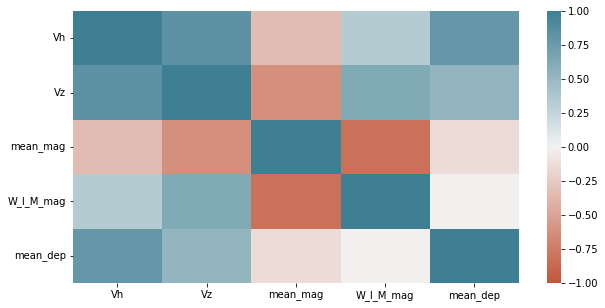

In [ ]:
NLSN1 = NLSN.drop(columns=["year","site"])
display(NLSN1.corr())
plt.figure(figsize = (10,5))
sns.heatmap(NLSN1.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

$\textbf{The nineth Site OUSD}$

Vh        Vz  mean_mag  W_I_M_mag  mean_dep
Vh         1.000000 -0.922353  0.364741  -0.299272 -0.630320
Vz        -0.922353  1.000000 -0.326330   0.251119  0.534190
mean_mag   0.364741 -0.326330  1.000000  -0.793818  0.088093
W_I_M_mag -0.299272  0.251119 -0.793818   1.000000 -0.218739
mean_dep  -0.630320  0.534190  0.088093  -0.218739  1.000000

<AxesSubplot: >

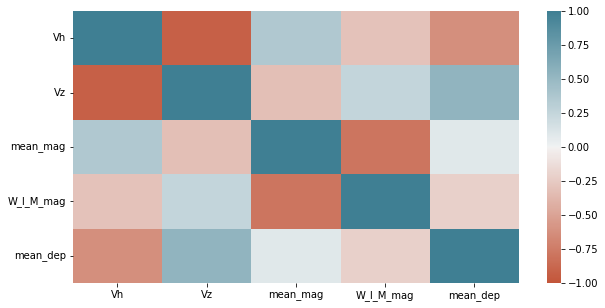

In [ ]:
OUSD1 = OUSD.drop(columns=["year","site"])
display(OUSD1.corr())
plt.figure(figsize = (10,5))
sns.heatmap(OUSD1.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

$\textbf{The tenth Site VEXA}$

Vh        Vz  mean_mag  W_I_M_mag  mean_dep
Vh         1.000000  0.538570  0.586391  -0.545709 -0.481641
Vz         0.538570  1.000000  0.006677   0.099431 -0.856253
mean_mag   0.586391  0.006677  1.000000  -0.795903 -0.068062
W_I_M_mag -0.545709  0.099431 -0.795903   1.000000 -0.089384
mean_dep  -0.481641 -0.856253 -0.068062  -0.089384  1.000000

<AxesSubplot: >

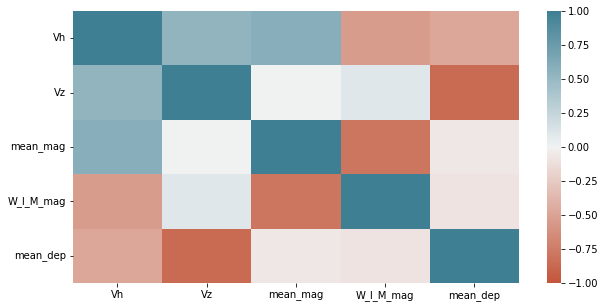

In [ ]:
VEXA1 = VEXA.drop(columns=["year","site"])
display(VEXA1.corr())
plt.figure(figsize = (10,5))
sns.heatmap(VEXA1.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

The conlusion from the results as shown above is that most of the parameters are indeed correlated, however, each site's parameters are affected differently by other parameters thus the differences in the correlation results.
<br>
To have a better view of the results, the analysis is narrowed down to indvidual Island and sites.

$\textbf{Narrowed Analysis for each Island independtly}$
<br>
<br>
Away from the broad analysis, in order to have a better picture of the relations between the data, it is analysed for each Island independently. Therefore the data is first split into two parts, one for North Island and the other for the South Island. The data is also cleaned to deal with only the large magnitude earthquakes >= 3 which will have a significant effect on plate motion. The analysis is narrowed down to the monthly basis which is important in showing the small details in the data.
<br>
The two Islands are to close to one another overlapping at some point in the latitudes, and the earthquakes at the extreme end of one Island next to the other can have an impact on the other Island thus a small overlap of about ${2}^{0}$ ~ 30 Km was allowed in splitting the data

###The same procedures as above are followed in the following cells thus no explanations for each site results.

$\textbf{Site data averaged per month}$

In [ ]:
Gsitedf_mn = Datafram.groupby(['site','year','month'])['Vh'].mean()
Gsitedf_mn = Gsitedf_mn.to_frame()
Vz_framemn = Datafram.groupby(['site','year','month'])['Vz'].mean()
Vz_framemn = Vz_framemn.to_frame()
Gsitedf_mn['Vz'] = Vz_framemn['Vz']
display(Gsitedf_mn.head())
Sitedf_mn = Gsitedf_mn.transpose()
display(Sitedf_mn)

Vh        Vz
site year month                    
AUCK 1995 Dec    0.006567  0.007865
          Jun    0.006864  0.007998
          May    0.000597  0.000701
          Nov    0.006385  0.007682
          Oct    0.006762  0.008097

site       AUCK                                                              \
year       1995                                                        1996   
month       Dec       Jun       May       Nov       Oct       Sep       Apr   
Vh     0.006567  0.006864  0.000597  0.006385  0.006762  0.006249  0.006755   
Vz     0.007865  0.007998  0.000701  0.007682  0.008097  0.007329  0.008083   

site                                 ...      WGTN                      \
year                                 ...      2022                       
month       Aug       Dec       Feb  ...       Aug       Feb       Jan   
Vh     0.006661  0.006606  0.006736  ...  0.004449  0.004203  0.004165   
Vz     0.008086  0.008214  0.008166  ...  0.000477  0.000518  0.000546   

site                                                                         
year                                                                         
month       Jul       Jun       Mar       May       Nov       Oct       Sep  
Vh     0.004408  0.004343  0.004242  0.004311  0.004536  0.004505  0.004470  
Vz     0.000462  0.000488  0.000521  0.000491  0.000480  0.000470  0.000459  

[2 rows x 2635 columns]

$\textbf{North Island Data}$

The data is extracted for this Island and the basic analysis performed to determine how the mean magnitudes, mean depths and weighted index mean magnitudes vary. The plots follow below.

In [ ]:
North_Island_EQ = DataEQ[(DataEQ['Latitudes'] <= -33) & (DataEQ['Latitudes'] >= -43) & (DataEQ['Longitudes'] <= 180) & 
             (DataEQ['Longitudes'] >= 171) & (DataEQ['magnitudes'] >= 3)]
North_Island_EQ.head()

magnitudes                    time    depths  Latitudes  Longitudes  \
1          4.6 2022-10-30 21:27:17.255   98806.0   -33.7325    179.6401   
2          4.5 2022-10-29 23:35:54.510   80015.0   -42.0176    172.6593   
4          4.7 2022-10-27 21:19:34.104   97590.0   -38.6865    176.2185   
15         5.0 2022-10-13 14:03:54.685  167004.0   -40.3844    173.4019   
18         4.0 2022-10-12 07:32:50.148   10000.0   -42.3534    172.1013   

    year_int  year  month_int month  
1       2022  2022         10   Oct  
2       2022  2022         10   Oct  
4       2022  2022         10   Oct  
15      2022  2022         10   Oct  
18      2022  2022         10   Oct

In [ ]:
NorthEQ_dfyr = (North_Island_EQ.groupby(["year"])['magnitudes'].mean())
NorthEQ_dfmn = (North_Island_EQ.groupby(["year","month"])['magnitudes'].mean())
NorthEQ_dfyr = NorthEQ_dfyr.to_frame().reset_index()
NorthEQ_dfmn = NorthEQ_dfmn.to_frame().reset_index()

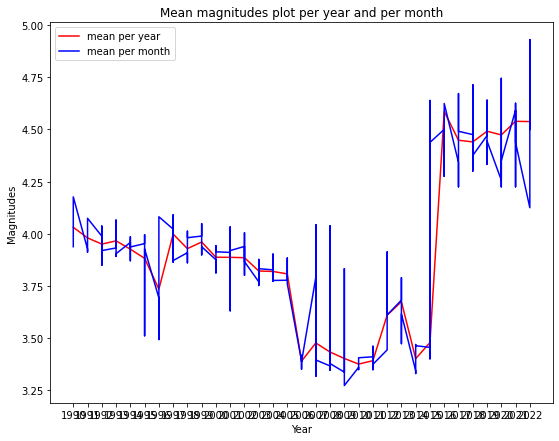

In [ ]:
plt.figure(figsize=(9,7))
plt.plot(NorthEQ_dfyr['year'], NorthEQ_dfyr['magnitudes'], color='r', label='mean per year')
plt.plot(NorthEQ_dfmn['year'], NorthEQ_dfmn['magnitudes'], color='b', label='mean per month')
plt.title('Mean magnitudes plot per year and per month')
plt.ylabel('Magnitudes')
plt.xlabel('Year')
plt.legend()
plt.show()

What is surprising about the data is the mean for the north Island sorted for only magnitudes >=3 appears in the way as the mean for all the data with sorting.

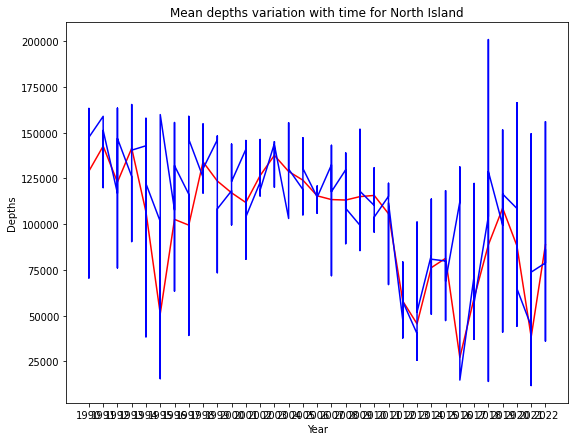

In [ ]:
Northmndep_dfyr = (North_Island_EQ.groupby(["year"])['depths'].mean())
Northmndep_dfyr = Northmndep_dfyr.to_frame().reset_index()
Northmndep_dfmn = (North_Island_EQ.groupby(["year","month"])['depths'].mean())
Northmndep_dfmn = Northmndep_dfmn.to_frame().reset_index()
plt.figure(figsize=(9,7))
plt.plot(Northmndep_dfyr['year'], Northmndep_dfyr['depths'], color='r', label='mean per year')
plt.plot(Northmndep_dfmn['year'], Northmndep_dfmn['depths'], color='b', label='mean per month')
plt.title('Mean depths variation with time for North Island')
plt.ylabel('Depths')
plt.xlabel('Year')
plt.show()

The mean depths also follow in the same way as the one for whole data i.e. falling gradually with time.

In [ ]:
Counts_df = North_Island_EQ.groupby(["year","month"])['magnitudes'].value_counts()
Counts_df = pd.DataFrame({'Counts': North_Island_EQ.groupby(["year",'month'])['magnitudes'].value_counts()})
Counts_df = Counts_df.reset_index()
Counts_df['W_I_mag'] = Counts_df['Counts']*Counts_df['magnitudes']
Counts_df.head()

year month  magnitudes  Counts  W_I_mag
0  1990   Apr         3.7      16     59.2
1  1990   Apr         3.9      15     58.5
2  1990   Apr         3.8      12     45.6
3  1990   Apr         4.1       7     28.7
4  1990   Apr         4.0       3     12.0

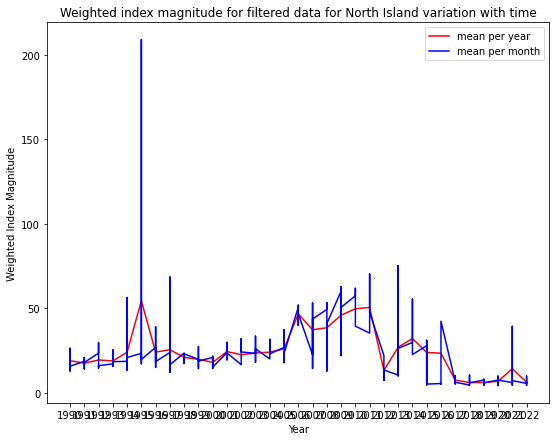

In [ ]:
NorthWMn_dfyr = (Counts_df.groupby(['year'])['W_I_mag'].mean())
NorthWMn_dfyr = NorthWMn_dfyr.to_frame().reset_index()
NorthWMn_dfmn = (Counts_df.groupby(['year','month'])['W_I_mag'].mean())
NorthWMn_dfmn = NorthWMn_dfmn.to_frame().reset_index()
plt.figure(figsize=(9,7))
plt.plot(NorthWMn_dfyr['year'], NorthWMn_dfyr['W_I_mag'], color='r', label='mean per year')
plt.plot(NorthWMn_dfmn['year'], NorthWMn_dfmn['W_I_mag'], color='b', label='mean per month')
plt.title('Weighted index magnitude for filtered data for North Island variation with time')
plt.ylabel('Weighted Index Magnitude')
plt.xlabel('Year')
plt.legend()
plt.show()

In [ ]:
AUCKmn = (Sitedf_mn[['AUCK']].transpose())
AUCKmn.reset_index(inplace=True)

HIKBmn = Sitedf_mn[['HIKB']].transpose()
HIKBmn.reset_index(inplace=True)

NPLYmn = Sitedf_mn[['NPLY']].transpose()
NPLYmn.reset_index(inplace=True)

PAEKmn = Sitedf_mn[['PAEK']].transpose()
PAEKmn.reset_index(inplace=True)

WGTNmn = Sitedf_mn[['WGTN']].transpose()
WGTNmn.reset_index(inplace=True)
display(WGTNmn.head())

site  year month        Vh        Vz
0  WGTN  1996   Aug  0.009232  0.000692
1  WGTN  1996   Dec  0.008702  0.000797
2  WGTN  1996   Jul  0.009028  0.000679
3  WGTN  1996   Jun  0.008446  0.000649
4  WGTN  1996   May  0.007619  0.000609

In [ ]:
NorthEQ_dfmn['year'] = NorthEQ_dfmn['year'].astype('int64')
AUCK_EQ11 = (NorthEQ_dfmn.drop(NorthEQ_dfmn.loc[ NorthEQ_dfmn['year'] < AUCKmn['year'].min() ].index)).set_index('year').reset_index()

HIKB_EQ11 = (NorthEQ_dfmn.drop(NorthEQ_dfmn.loc[ NorthEQ_dfmn['year'] < HIKBmn['year'].min() ].index)).set_index('year').reset_index()

NPLY_EQ11 = (NorthEQ_dfmn.drop(NorthEQ_dfmn.loc[ NorthEQ_dfmn['year'] < NPLYmn['year'].min() ].index)).set_index('year').reset_index()

PAEK_EQ11 = (NorthEQ_dfmn.drop(NorthEQ_dfmn.loc[ NorthEQ_dfmn['year'] < PAEKmn['year'].min() ].index)).set_index('year').reset_index()

WGTN_EQ11 = (NorthEQ_dfmn.drop(NorthEQ_dfmn.loc[ NorthEQ_dfmn['year'] < WGTNmn['year'].min() ].index)).set_index('year').reset_index()

In [ ]:
NorthWMn_dfmn['year'] = NorthWMn_dfmn['year'].astype('int64')
AUCK_EQ22 = (NorthWMn_dfmn.drop(NorthWMn_dfmn.loc[ NorthWMn_dfmn['year'] < AUCKmn['year'].min() ].index)).set_index('year').reset_index()

HIKB_EQ22 = (NorthWMn_dfmn.drop(NorthWMn_dfmn.loc[ NorthWMn_dfmn['year'] < HIKBmn['year'].min() ].index)).set_index('year').reset_index()

NPLY_EQ22 = (NorthWMn_dfmn.drop(NorthWMn_dfmn.loc[ NorthWMn_dfmn['year'] < NPLYmn['year'].min() ].index)).set_index('year').reset_index()

PAEK_EQ22 = (NorthWMn_dfmn.drop(NorthWMn_dfmn.loc[ NorthWMn_dfmn['year'] < PAEKmn['year'].min() ].index)).set_index('year').reset_index()

WGTN_EQ22 = (NorthWMn_dfmn.drop(NorthWMn_dfmn.loc[ NorthWMn_dfmn['year'] < WGTNmn['year'].min() ].index)).set_index('year').reset_index()

In [ ]:
Northmndep_dfmn['year'] = Northmndep_dfmn['year'].astype('int64')
AUCKmn_Dep = (Northmndep_dfmn.drop(Northmndep_dfmn.loc[ Northmndep_dfmn['year'] < AUCKmn['year'].min() ].index)).set_index('year').reset_index()

HIKBmn_Dep = (Northmndep_dfmn.drop(Northmndep_dfmn.loc[ Northmndep_dfmn['year'] < HIKBmn['year'].min() ].index)).set_index('year').reset_index()

NPLYmn_Dep = (Northmndep_dfmn.drop(Northmndep_dfmn.loc[ Northmndep_dfmn['year'] < NPLYmn['year'].min() ].index)).set_index('year').reset_index()

PAEKmn_Dep = (Northmndep_dfmn.drop(Northmndep_dfmn.loc[ Northmndep_dfmn['year'] < PAEKmn['year'].min() ].index)).set_index('year').reset_index()

WGTNmn_Dep = (Northmndep_dfmn.drop(Northmndep_dfmn.loc[ Northmndep_dfmn['year'] < WGTNmn['year'].min() ].index)).set_index('year').reset_index()

In [ ]:
AUCKmn['mean_mag'] = AUCK_EQ11['magnitudes']
AUCKmn['W_I_M_mag'] = AUCK_EQ22['W_I_mag']
AUCKmn['mean_dep'] = AUCKmn_Dep['depths']

HIKBmn['mean_mag'] = HIKB_EQ11['magnitudes']
HIKBmn['W_I_M_mag'] = HIKB_EQ22['W_I_mag']
HIKBmn['mean_dep'] = HIKBmn_Dep['depths']

NPLYmn['mean_mag'] = NPLY_EQ11['magnitudes']
NPLYmn['W_I_M_mag'] = NPLY_EQ22['W_I_mag']
NPLYmn['mean_dep'] = NPLYmn_Dep['depths']

PAEKmn['mean_mag'] = PAEK_EQ11['magnitudes']
PAEKmn['W_I_M_mag'] = PAEK_EQ22['W_I_mag']
PAEKmn['mean_dep'] = PAEKmn_Dep['depths']

WGTNmn['mean_mag'] = WGTN_EQ11['magnitudes']
WGTNmn['W_I_M_mag'] = WGTN_EQ22['W_I_mag']
WGTNmn['mean_dep'] = WGTNmn_Dep['depths']

In [ ]:
AUCKmn.head()

site  year month        Vh        Vz  mean_mag   W_I_M_mag       mean_dep
0  AUCK  1995   Dec  0.006567  0.007865  3.953000   23.252941  101470.000000
1  AUCK  1995   Jun  0.006864  0.007998  3.986111   22.076923  157291.666667
2  AUCK  1995   May  0.000597  0.000701  3.511790   38.295238   66665.502183
3  AUCK  1995   Nov  0.006385  0.007682  3.945432  208.980645   15559.500609
4  AUCK  1995   Oct  0.006762  0.008097  3.995789   23.725000  103875.789474

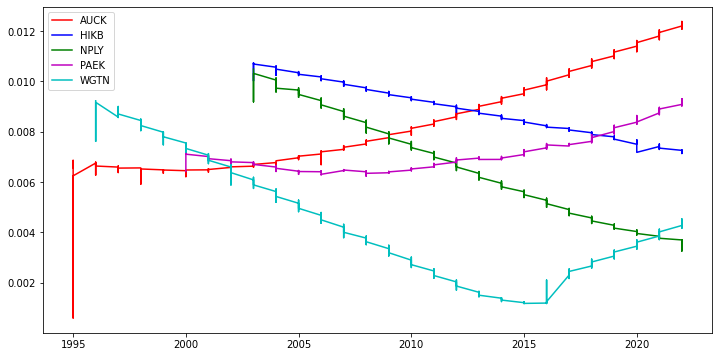

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.plot(AUCKmn['year'], AUCKmn['Vh'], color='r', label='AUCK')
plt.plot(HIKBmn['year'], HIKBmn['Vh'], color='b', label='HIKB')
plt.plot(NPLYmn['year'], NPLYmn['Vh'], color='g', label='NPLY')
plt.plot(PAEKmn['year'], PAEKmn['Vh'], color='m', label='PAEK')
plt.plot(WGTNmn['year'], WGTNmn['Vh'], color='c', label='WGTN')
plt.legend()
plt.show()

The velocities averaged per month follow same trend as averaged per year, differing by the small instabilities or complixity of the line

$\textbf{Site AUCK North Island}$

Vh        Vz  mean_mag  W_I_M_mag  mean_dep
Vh         1.000000  0.052182  0.525020  -0.378431 -0.434395
Vz         0.052182  1.000000 -0.015128  -0.019003  0.153640
mean_mag   0.525020 -0.015128  1.000000  -0.637010 -0.152813
W_I_M_mag -0.378431 -0.019003 -0.637010   1.000000 -0.025861
mean_dep  -0.434395  0.153640 -0.152813  -0.025861  1.000000

<AxesSubplot: >

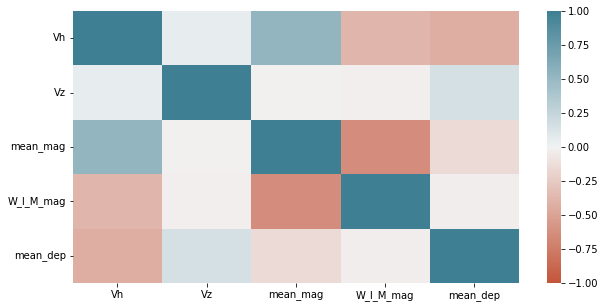

In [ ]:
AUCK2 = AUCKmn.drop(columns=["year","site","month"])
display(AUCK2.corr())
plt.figure(figsize = (10,5))
sns.heatmap(AUCK2.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

$\textbf{Site HIKB North Island}$

Vh        Vz  mean_mag  W_I_M_mag  mean_dep
Vh         1.000000  0.111113 -0.652238   0.567313  0.452356
Vz         0.111113  1.000000  0.289389  -0.126382  0.295757
mean_mag  -0.652238  0.289389  1.000000  -0.795950 -0.224192
W_I_M_mag  0.567313 -0.126382 -0.795950   1.000000  0.184925
mean_dep   0.452356  0.295757 -0.224192   0.184925  1.000000

<AxesSubplot: >

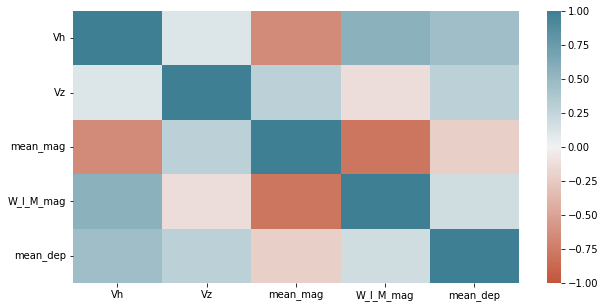

In [ ]:
HIKB2 = HIKBmn.drop(columns=["year","site","month"])
display(HIKB2.corr())
plt.figure(figsize = (10,5))
sns.heatmap(HIKB2.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

$\textbf{Site NPLY North Island}$

Vh        Vz  mean_mag  W_I_M_mag  mean_dep
Vh         1.000000  0.479978 -0.646010   0.571472  0.456448
Vz         0.479978  1.000000 -0.388230   0.377181  0.138682
mean_mag  -0.646010 -0.388230  1.000000  -0.797647 -0.220068
W_I_M_mag  0.571472  0.377181 -0.797647   1.000000  0.180381
mean_dep   0.456448  0.138682 -0.220068   0.180381  1.000000

<AxesSubplot: >

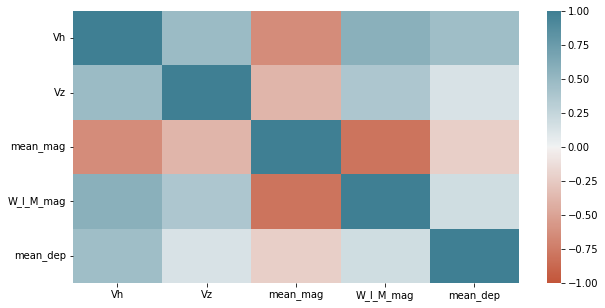

In [ ]:
NPLY2 = NPLYmn.drop(columns=["year","site","month"])
display(NPLY2.corr())
plt.figure(figsize = (10,5))
sns.heatmap(NPLY2.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

$\textbf{Site PAEK North Island}$

Vh        Vz  mean_mag  W_I_M_mag  mean_dep
Vh         1.000000  0.304693  0.763481  -0.644472 -0.291578
Vz         0.304693  1.000000  0.286074  -0.163678  0.014137
mean_mag   0.763481  0.286074  1.000000  -0.790990 -0.209641
W_I_M_mag -0.644472 -0.163678 -0.790990   1.000000  0.157303
mean_dep  -0.291578  0.014137 -0.209641   0.157303  1.000000

<AxesSubplot: >

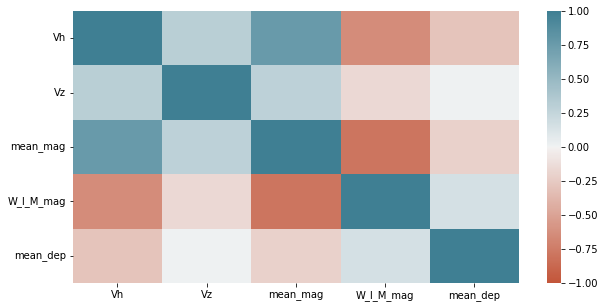

In [ ]:
PAEK2 = PAEKmn.drop(columns=["year","site","month"])
display(PAEK2.corr())
plt.figure(figsize = (10,5))
sns.heatmap(PAEK2.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

$\textbf{Site WGTN North Island}$

Vh        Vz  mean_mag  W_I_M_mag  mean_dep
Vh         1.000000  0.117451  0.076601  -0.047146  0.486837
Vz         0.117451  1.000000  0.154921  -0.041663 -0.029660
mean_mag   0.076601  0.154921  1.000000  -0.768694 -0.168774
W_I_M_mag -0.047146 -0.041663 -0.768694   1.000000  0.077533
mean_dep   0.486837 -0.029660 -0.168774   0.077533  1.000000

<AxesSubplot: >

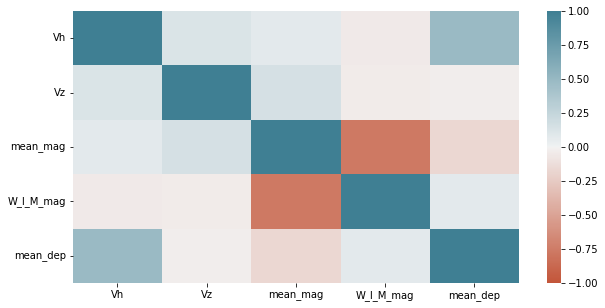

In [ ]:
WGTN2 = WGTNmn.drop(columns=["year","site","month"])
display(WGTN2.corr())
plt.figure(figsize = (10,5))
sns.heatmap(WGTN2.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

$\textbf{South Island Data}$

In [ ]:
South_Island_EQ = DataEQ[(DataEQ['Latitudes'] <= -40) & (DataEQ['Latitudes'] >= -48) & (DataEQ['Longitudes'] <= 177) & 
                         (DataEQ['Longitudes'] >= 165) & (DataEQ['magnitudes'] >= 3)]
South_Island_EQ.head()

magnitudes                    time    depths  Latitudes  Longitudes  \
2          4.5 2022-10-29 23:35:54.510   80015.0   -42.0176    172.6593   
10         4.1 2022-10-17 03:10:06.896   34814.0   -47.6727    165.4435   
15         5.0 2022-10-13 14:03:54.685  167004.0   -40.3844    173.4019   
18         4.0 2022-10-12 07:32:50.148   10000.0   -42.3534    172.1013   
22         4.2 2022-10-08 10:20:44.062   79698.0   -45.0562    167.3876   

    year_int  year  month_int month  
2       2022  2022         10   Oct  
10      2022  2022         10   Oct  
15      2022  2022         10   Oct  
18      2022  2022         10   Oct  
22      2022  2022         10   Oct

In [ ]:
SouthEQ_dfyr = (South_Island_EQ.groupby(["year"])['magnitudes'].mean())
SouthEQ_dfmn = (South_Island_EQ.groupby(["year","month"])['magnitudes'].mean())
SouthEQ_dfyr = SouthEQ_dfyr.to_frame().reset_index()
SouthEQ_dfmn = SouthEQ_dfmn.to_frame().reset_index()

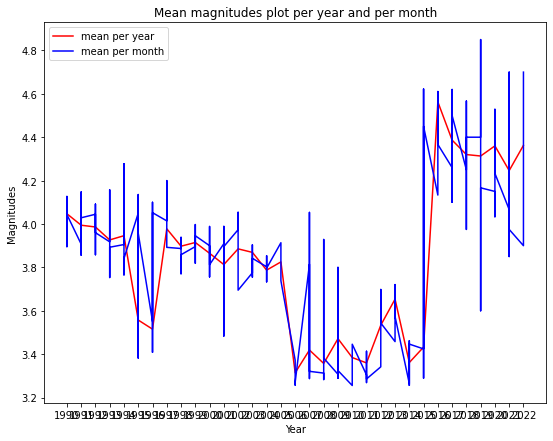

In [ ]:
plt.figure(figsize=(9,7))
plt.plot(SouthEQ_dfyr['year'], SouthEQ_dfyr['magnitudes'], color='r', label='mean per year')
plt.plot(SouthEQ_dfmn['year'], SouthEQ_dfmn['magnitudes'], color='b', label='mean per month')
plt.title('Mean magnitudes plot per year and per month')
plt.ylabel('Magnitudes')
plt.xlabel('Year')
plt.legend()
plt.show()

The plot are is similar to the one for the North Island. This implies seismicity changes in two regions simultaneously in the same although the seem seperate. This could be to the fact the Island are all seated on the same plate in the same subduction zone.

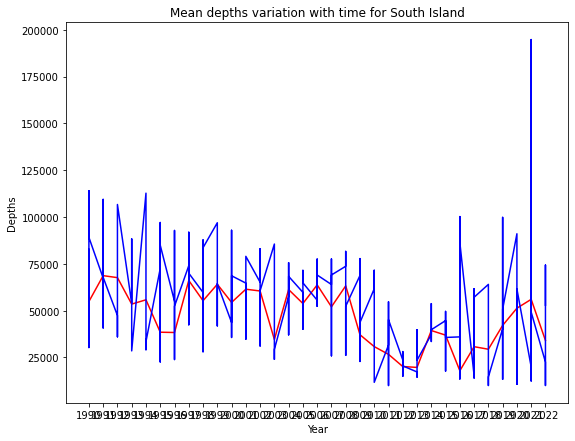

In [ ]:
Southmndep_dfyr = (South_Island_EQ.groupby(["year"])['depths'].mean())
Southmndep_dfyr = Southmndep_dfyr.to_frame().reset_index()
Southmndep_dfmn = (South_Island_EQ.groupby(["year","month"])['depths'].mean())
Southmndep_dfmn = Southmndep_dfmn.to_frame().reset_index()
plt.figure(figsize=(9,7))
plt.plot(Southmndep_dfyr['year'], Southmndep_dfyr['depths'], color='r', label='mean per year')
plt.plot(Southmndep_dfmn['year'], Southmndep_dfmn['depths'], color='b', label='mean per month')
plt.title('Mean depths variation with time for South Island')
plt.ylabel('Depths')
plt.xlabel('Year')
plt.show()

Earthquakes in this Island are shallower than those in the North Island.

In [ ]:
Count_df = South_Island_EQ.groupby(["year","month"])['magnitudes'].value_counts()
Count_df = pd.DataFrame({'Count': South_Island_EQ.groupby(["year",'month'])['magnitudes'].value_counts()})
Count_df = Count_df.reset_index()
Count_df['W_I_mag'] = Count_df['Count']*Count_df['magnitudes']
Count_df.head()

year month  magnitudes  Count  W_I_mag
0  1990   Apr         3.7      5     18.5
1  1990   Apr         3.8      5     19.0
2  1990   Apr         3.9      3     11.7
3  1990   Apr         4.4      3     13.2
4  1990   Apr         3.6      2      7.2

In [ ]:
SouthEQ_dfyr = pd.DataFrame({'MeanMagYr': (Count_df.groupby(['year'])['W_I_mag'].sum()/Count_df.groupby(['year'])['Count'].sum())})
SouthEQ_dfyr = SouthEQ_dfyr.reset_index()
display(SouthEQ_dfyr.head())

SouthEQ_dfmn = pd.DataFrame({'MeanMagMn': (Count_df.groupby(['year','month'])['W_I_mag'].sum()/Count_df.groupby(['year','month'])['Count'].sum())})
SouthEQ_dfmn = SouthEQ_dfmn.reset_index()
display(SouthEQ_dfmn.head())

year  MeanMagYr
0  1990   4.047230
1  1991   3.994355
2  1992   3.986175
3  1993   3.926606
4  1994   3.946021

year month  MeanMagMn
0  1990   Apr   3.965217
1  1990   Aug   4.115789
2  1990   Dec   3.955556
3  1990   Feb   4.108451
4  1990   Jan   3.923529

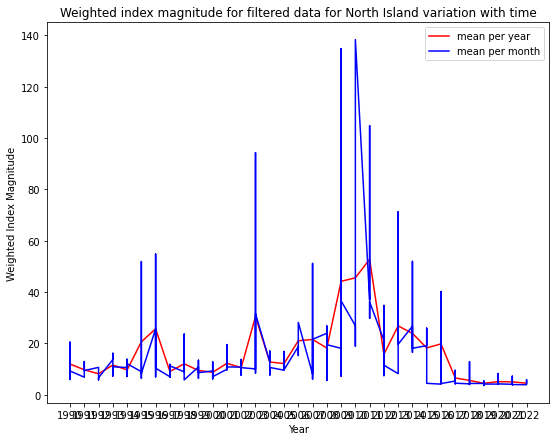

In [ ]:
SouthWMn_dfyr = (Count_df.groupby(['year'])['W_I_mag'].mean())
SouthWMn_dfyr = SouthWMn_dfyr.to_frame().reset_index()
SouthWMn_dfmn = (Count_df.groupby(['year','month'])['W_I_mag'].mean())
SouthWMn_dfmn = SouthWMn_dfmn.to_frame().reset_index()
plt.figure(figsize=(9,7))
plt.plot(SouthWMn_dfyr['year'], SouthWMn_dfyr['W_I_mag'], color='r', label='mean per year')
plt.plot(SouthWMn_dfmn['year'], SouthWMn_dfmn['W_I_mag'], color='b', label='mean per month')
plt.title('Weighted index magnitude for filtered data for North Island variation with time')
plt.ylabel('Weighted Index Magnitude')
plt.xlabel('Year')
plt.legend()
plt.show()

$\textbf{GPS Sites in the South Island}$

In [ ]:
HOKImn = Sitedf_mn[['HOKI']].transpose()
HOKImn.reset_index(inplace=True)

LYTTmn = Sitedf_mn[['LYTT']].transpose()
LYTTmn.reset_index(inplace=True)

NLSNmn = Sitedf_mn[['NLSN']].transpose()
NLSNmn.reset_index(inplace=True)

OUSDmn = Sitedf_mn[['OUSD']].transpose()
OUSDmn.reset_index(inplace=True)

VEXAmn = Sitedf_mn[['VEXA']].transpose()
VEXAmn.reset_index(inplace=True)
display(VEXAmn.head())

site  year month        Vh        Vz
0  VEXA  2000   Apr  0.011157  0.008505
1  VEXA  2000   Feb  0.010730  0.008148
2  VEXA  2000   Mar  0.011128  0.008481
3  VEXA  2001   Apr  0.010932  0.008473
4  VEXA  2001   Dec  0.010253  0.008106

In [ ]:
SouthEQ_dfmn['year'] = SouthEQ_dfmn['year'].astype('int64')
HOKI_EQ11 = (SouthEQ_dfmn.drop(SouthEQ_dfmn.loc[ SouthEQ_dfmn['year'] < HOKImn['year'].min() ].index)).set_index('year').reset_index()

LYTT_EQ11 = (SouthEQ_dfmn.drop(SouthEQ_dfmn.loc[ SouthEQ_dfmn['year'] < LYTTmn['year'].min() ].index)).set_index('year').reset_index()

NLSN_EQ11 = (SouthEQ_dfmn.drop(SouthEQ_dfmn.loc[ SouthEQ_dfmn['year'] < NLSNmn['year'].min() ].index)).set_index('year').reset_index()

OUSD_EQ11 = (SouthEQ_dfmn.drop(SouthEQ_dfmn.loc[ SouthEQ_dfmn['year'] < OUSDmn['year'].min() ].index)).set_index('year').reset_index()

VEXA_EQ11 = (SouthEQ_dfmn.drop(SouthEQ_dfmn.loc[ SouthEQ_dfmn['year'] < VEXAmn['year'].min() ].index)).set_index('year').reset_index()

In [ ]:
SouthWMn_dfmn['year'] = SouthWMn_dfmn['year'].astype('int64')
HOKI_EQ22 = (SouthWMn_dfmn.drop(SouthWMn_dfmn.loc[ SouthWMn_dfmn['year'] < HOKImn['year'].min() ].index)).set_index('year').reset_index()

LYTT_EQ22 = (SouthWMn_dfmn.drop(SouthWMn_dfmn.loc[ SouthWMn_dfmn['year'] < LYTTmn['year'].min() ].index)).set_index('year').reset_index()

NLSN_EQ22 = (SouthWMn_dfmn.drop(SouthWMn_dfmn.loc[ SouthWMn_dfmn['year'] < NLSNmn['year'].min() ].index)).set_index('year').reset_index()

OUSD_EQ22 = (SouthWMn_dfmn.drop(SouthWMn_dfmn.loc[ SouthWMn_dfmn['year'] < OUSDmn['year'].min() ].index)).set_index('year').reset_index()

VEXA_EQ22 = (SouthWMn_dfmn.drop(SouthWMn_dfmn.loc[ SouthWMn_dfmn['year'] < VEXAmn['year'].min() ].index)).set_index('year').reset_index()

In [ ]:
Southmndep_dfmn['year'] = Southmndep_dfmn['year'].astype('int64')
HOKImn_Dep = (Southmndep_dfmn.drop(Southmndep_dfmn.loc[ Southmndep_dfmn['year'] < HOKImn['year'].min() ].index)).set_index('year').reset_index()

LYTTmn_Dep = (Southmndep_dfmn.drop(Southmndep_dfmn.loc[ Southmndep_dfmn['year'] < LYTTmn['year'].min() ].index)).set_index('year').reset_index()

NLSNmn_Dep = (Southmndep_dfmn.drop(Southmndep_dfmn.loc[ Southmndep_dfmn['year'] < NLSNmn['year'].min() ].index)).set_index('year').reset_index()

OUSDmn_Dep = (Southmndep_dfmn.drop(Southmndep_dfmn.loc[ Southmndep_dfmn['year'] < OUSDmn['year'].min() ].index)).set_index('year').reset_index()

VEXAmn_Dep = (Southmndep_dfmn.drop(Southmndep_dfmn.loc[ Southmndep_dfmn['year'] < VEXAmn['year'].min() ].index)).set_index('year').reset_index()

In [ ]:
HOKImn['mean_mag'] = HOKI_EQ11['MeanMagMn']
HOKImn['W_I_M_mag'] = HOKI_EQ22['W_I_mag']
HOKImn['mean_dep'] = HOKI_Dep['depths']

LYTTmn['mean_mag'] = LYTT_EQ11['MeanMagMn']
LYTTmn['W_I_M_mag'] = LYTT_EQ22['W_I_mag']
LYTTmn['mean_dep'] = LYTT_Dep['depths']

NLSNmn['mean_mag'] = NLSN_EQ11['MeanMagMn']
NLSNmn['W_I_M_mag'] = NLSN_EQ22['W_I_mag']
NLSNmn['mean_dep'] = NLSN_Dep['depths']

OUSDmn['mean_mag'] = OUSD_EQ11['MeanMagMn']
OUSDmn['W_I_M_mag'] = OUSD_EQ22['W_I_mag']
OUSDmn['mean_dep'] = OUSD_Dep['depths']

VEXAmn['mean_mag'] = VEXA_EQ11['MeanMagMn']
VEXAmn['W_I_M_mag'] = VEXA_EQ22['W_I_mag']
VEXAmn['mean_dep'] = VEXA_Dep['depths']

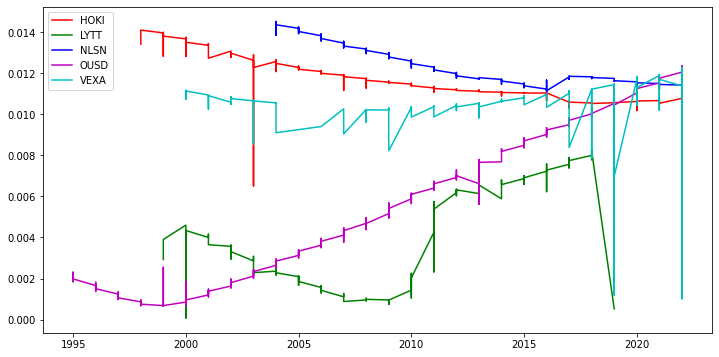

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.plot(HOKImn['year'], HOKImn['Vh'], color='r', label='HOKI')
plt.plot(LYTTmn['year'], LYTTmn['Vh'], color='g', label='LYTT')
plt.plot(NLSNmn['year'], NLSNmn['Vh'], color='b', label='NLSN')
plt.plot(OUSDmn['year'], OUSDmn['Vh'], color='m', label='OUSD')
plt.plot(VEXAmn['year'], VEXAmn['Vh'], color='c', label='VEXA')
plt.legend()
plt.show()

The average velocities are also evaluated on a monthly basis but the trends are pretty much the same as the ones plotted above for the whole time period.

$\textbf{Site HOKI South Island}$

Vh        Vz  mean_mag  W_I_M_mag  mean_dep
Vh         1.000000  0.159498 -0.177403  -0.003179  0.242233
Vz         0.159498  1.000000  0.106150   0.014551  0.047034
mean_mag  -0.177403  0.106150  1.000000  -0.474516  0.035166
W_I_M_mag -0.003179  0.014551 -0.474516   1.000000  0.334112
mean_dep   0.242233  0.047034  0.035166   0.334112  1.000000

<AxesSubplot: >

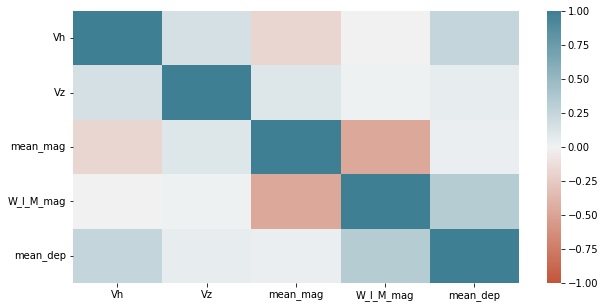

In [ ]:
HOKI2 = HOKImn.drop(columns=["year","site","month"])
display(HOKI2.corr())
plt.figure(figsize = (10,5))
sns.heatmap(HOKI2.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

$\textbf{Site LYTT South Island}$

Vh        Vz  mean_mag  W_I_M_mag  mean_dep
Vh         1.000000  0.701945 -0.230948   0.221184 -0.315171
Vz         0.701945  1.000000 -0.442824   0.293826 -0.478520
mean_mag  -0.230948 -0.442824  1.000000  -0.388912  0.147422
W_I_M_mag  0.221184  0.293826 -0.388912   1.000000  0.104119
mean_dep  -0.315171 -0.478520  0.147422   0.104119  1.000000

<AxesSubplot: >

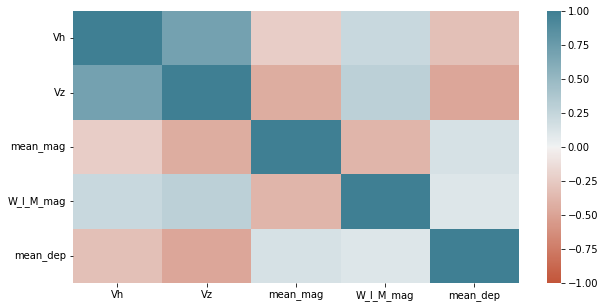

In [ ]:
LYTT2 = LYTTmn.drop(columns=["year","site"])
display(LYTT2.corr())
plt.figure(figsize = (10,5))
sns.heatmap(LYTT2.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

$\textbf{Site NLSN South Island}$

Vh        Vz  mean_mag  W_I_M_mag  mean_dep
Vh         1.000000  0.806364 -0.424128   0.145875  0.200111
Vz         0.806364  1.000000 -0.638015   0.327743  0.355626
mean_mag  -0.424128 -0.638015  1.000000  -0.509067  0.001389
W_I_M_mag  0.145875  0.327743 -0.509067   1.000000  0.075955
mean_dep   0.200111  0.355626  0.001389   0.075955  1.000000

<AxesSubplot: >

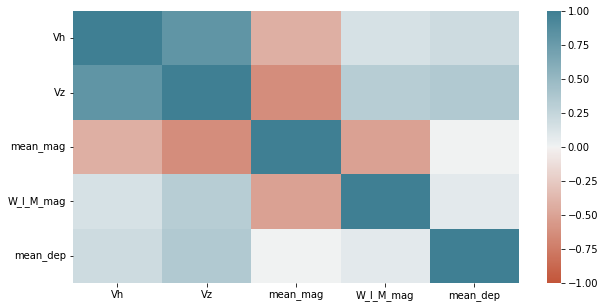

In [ ]:
NLSN2 = NLSNmn.drop(columns=["year","site"])
display(NLSN2.corr())
plt.figure(figsize = (10,5))
sns.heatmap(NLSN2.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

$\textbf{Site OUSD South Island}$

Vh        Vz  mean_mag  W_I_M_mag  mean_dep
Vh         1.000000 -0.706712  0.335485  -0.087669  0.603219
Vz        -0.706712  1.000000 -0.227771   0.112113  0.072862
mean_mag   0.335485 -0.227771  1.000000  -0.499246 -0.047939
W_I_M_mag -0.087669  0.112113 -0.499246   1.000000 -0.004686
mean_dep   0.603219  0.072862 -0.047939  -0.004686  1.000000

<AxesSubplot: >

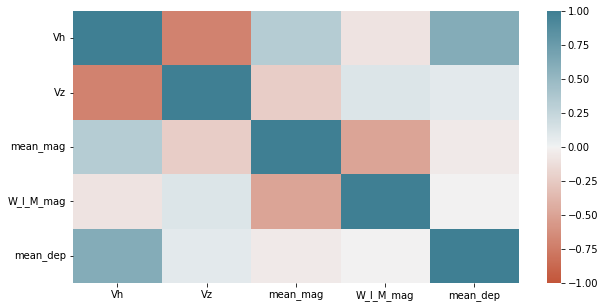

In [ ]:
OUSD2 = OUSDmn.drop(columns=["year","site"])
display(OUSD2.corr())
plt.figure(figsize = (10,5))
sns.heatmap(OUSD2.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

$\textbf{Site VEXA South Island}$

Vh        Vz  mean_mag  W_I_M_mag  mean_dep
Vh         1.000000  0.843879 -0.093061   0.044025  0.189283
Vz         0.843879  1.000000 -0.045666   0.058410 -0.124285
mean_mag  -0.093061 -0.045666  1.000000  -0.356560  0.093293
W_I_M_mag  0.044025  0.058410 -0.356560   1.000000 -0.274936
mean_dep   0.189283 -0.124285  0.093293  -0.274936  1.000000

<AxesSubplot: >

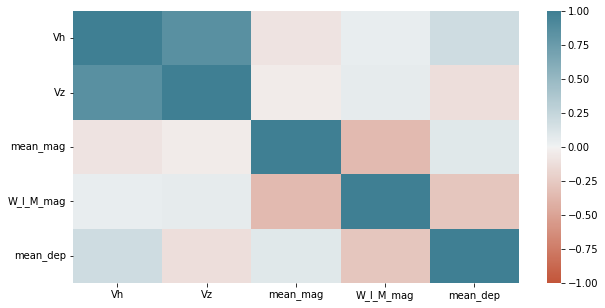

In [ ]:
VEXA2 = VEXAmn.drop(columns=["year","site"])
display(VEXA2.corr())
plt.figure(figsize = (10,5))
sns.heatmap(VEXA2.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

$\textbf{Final Remarks and Conclusion}$

From the above analysis, it can be seen clearly that the correlations have reduced at all instances when the data was seperated for all the sites. This can be observed in the data for sites/stations say; 
1. AUCK for correlations between Vh and Vz (negative), Vh and Mean Depth (negative), and Vh and Mean Magnitude (positive).
2. NPLY for correlations between Vh and Vz (positive and strong), Vh and Mean Depth (positive and strong),  and Vh and Mean Magnitude (negative and averagely strong).
3. NLSN for correlations between Vh and Vz (positive and strong), Vh and Mean Magnitude (negative and strong) and Vh and Mean Depth (postive and strong). 
4. OUSD for correlations between Vh and Vz (negative) and Vh and Mean Depth (negative)

These correlations were initially stronger but dividing the data reduced all of them. It is however important to note that the correlations did not change sign thus same relationship remained although it became weaker on dividing the data. This implies that the earthquakes in one Island have a significant impact on the plate motion in the other Island.
<br>
Note: The correlation between Vh and Vz may have less geophysical meaning especially when both of them are increasing. However, an increase in one with a decrease in the other may be interpreted differently.


In conclusion, the parameters' relations may be are dependant upon other factors as the are varying differently for each GPS station. This means increased mean magnitude earthquakes or seimicity may not necessarily imply increased velocities of the plate, and the reduction in velocities could be resulting from say friction between the plates but not earthquakes.
Also earthquakes happening at shallower depths may not always results into an increase in the velocity of the plates.
<br>
Thus the two plate motion may be dependant on earthquakes occurrences and vice-vera, however, this relation is constrained on other plates which could be related to a specific location.

Further studies may be required to establish the other factors which come into play.
<br>
$\textbf{Thank you}$